In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

In [121]:


data = pd.read_excel('./Data/BDDAudace.xlsx')


In [122]:
print(f'{data.columns.to_list()}')

['Revenu net des cultures de spéculation', 'Paroduction Haricot Annuelle en Valeur', 'Production Annuelle Petit pois en Valeur', 'Production Annuelle soja en valeur', 'Production pomme de terre annuelle en valeur', 'Production manioc en valeur Annuelle', 'Production Patate douce en Valeur Annuelle', 'Production colocase en valeur Annuelle', 'Production arachide en Valeur Annuelle', 'Production en valeur tournesol Annuelle', 'Production en valeur Mais Annuelle', 'Production en Valeur Riz Annuelle', 'Production en valeur Sorgho Annuelle', 'Production en valeur café', 'Production en valeur Banane annuelle', 'Production en  valeur autres cultures', 'Production en valeur Elevage Annuelle', 'Revenu annuel autres sources', 'Depenses totales annuelles', 'Revenu Net Agropastorale', 'Revenu Réel du ménage', 'ZME', 'Age du chef du ménage', 'Genre  du chef de ménage', 'Situation matrimoniale du chef de ménage', 'Niveau du chef de ménage', 'Activité principale du chef de ménage ', 'Activité seconda

In [123]:

noms_colonnes = [
    'revenu_net_cultures_speculation', 'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle',
    'valeur_soja_annuelle', 'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle',
    'valeur_patate_douce_annuelle', 'valeur_colocase_annuelle', 'valeur_arachide_annuelle',
    'valeur_tournesol_annuelle', 'valeur_mais_annuelle', 'valeur_riz_annuelle', 
    'valeur_sorgho_annuelle', 'valeur_cafe', 'valeur_banane_annuelle', 'valeur_autres_cultures', 
    'valeur_elevage_annuelle', 'revenu_autres_sources_annuelles', 'depenses_totales_annuelles',
    'revenu_net_agropastoral', 'revenu_reel_menage', 'zme', 'age_chef_menage', 
    'genre_chef_menage', 'situation_matrimoniale', 'niveau_chef_menage', 
    'activite_principale', 'activite_secondaire', 'taille_menage', 'education_hommes',
    'education_femmes', 'nombre_pieces_logement', 'etat_maison', 'org_production_agricole',
    'acces_terre', 'mode_acces_terre', 'superficie_totale_terre', 'superficie_cultivable',
    'encadrement_agronomique', 'cultures_pures', 'jachere', 'assolement',
    'champ_ecole_paysan', 'systeme_rizicole', 'mecanisation', 'insemination_artificielle', 'association_cultures',
    'stabulation_permanente', 'cooperative', 'semences_selectionnees', 'main_doeuvre_disponible',
    'irrigation', 'experience_agricole', 'nombre_saisons', 'parcelle_colline', 'parcelle_marais',
    'annees_production_speculation', 'cultures_annuelles_12m', 'cultures_annuelles_change',
    'cultures_perennes_12m', 'cultures_perennes_change', 'cultures_rente_12m',
    'ventes_cultures_rente_change', 'repas_adultes_jour', 
    'repas_enfants_jour', 'repas_important', 'duree_stock_saison_a', 'duree_stock_saison_b',
    'duree_stock_saison_c', 'sca', 'security_index'
]


In [124]:
# Identify columns with identical content
duplicate_content = data.T.duplicated()
if any(duplicate_content):
    print("Columns with identical content found. Removing duplicates...")
    
    # Remove duplicate columns based on content
    data = data.loc[:, ~data.T.duplicated()]
    print("Duplicate content columns removed. Updated columns:")
else:
    print("No columns with identical content found.")


No columns with identical content found.


In [125]:
# Vérifiez que le nombre de colonnes dans votre DataFrame correspond au nombre de noms
if len(data.columns) == len(noms_colonnes):
    data.columns = noms_colonnes
    print("Les colonnes ont été renommées avec succès.")
else:
    print(f"Erreur : Nombre de colonnes dans le DataFrame ({len(data.columns)}) différent du nombre de noms ({len(noms_colonnes)}).")


Les colonnes ont été renommées avec succès.


In [126]:
data['zme'].unique()

array(['Depression du Nord', 'Pateaux centraux humides'], dtype=object)

In [127]:
data['zme'] = data['zme'].map({
    'Depression du Nord': 1,
    'Pateaux centraux humides': 2
})


In [128]:
# Find columns with missing values (NaN or None)
missing_columns = data.columns[data.isna().any()]

# Print the columns with missing values
print("Columns with missing values:")
print(missing_columns)

# Alternatively, print the rows where any missing values exist
print("\nRows with missing values:")
print(data[missing_columns].isna().sum())

Columns with missing values:
Index(['mode_acces_terre', 'superficie_cultivable'], dtype='object')

Rows with missing values:
mode_acces_terre         22
superficie_cultivable    21
dtype: int64


In [129]:
data['mode_acces_terre'] = data['mode_acces_terre'].fillna(0)
data['superficie_cultivable'] = data['superficie_cultivable'].fillna(0)

In [130]:
# Convert non-numeric values to NaN for all columns
data = data.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with 0
data.fillna(0, inplace=True)


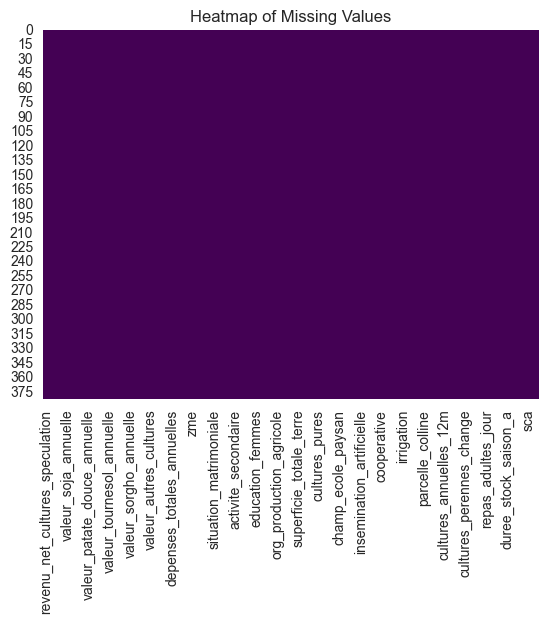

In [131]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2856626176.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='genre_chef_menage', palette='pastel', ax=axes[0, 1])
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2856626176.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='niveau_chef_menage', palette='muted', ax=axes[0, 2])
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2856626176.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='acces_terre', palette='cool', ax=axes[1, 0])
C:\

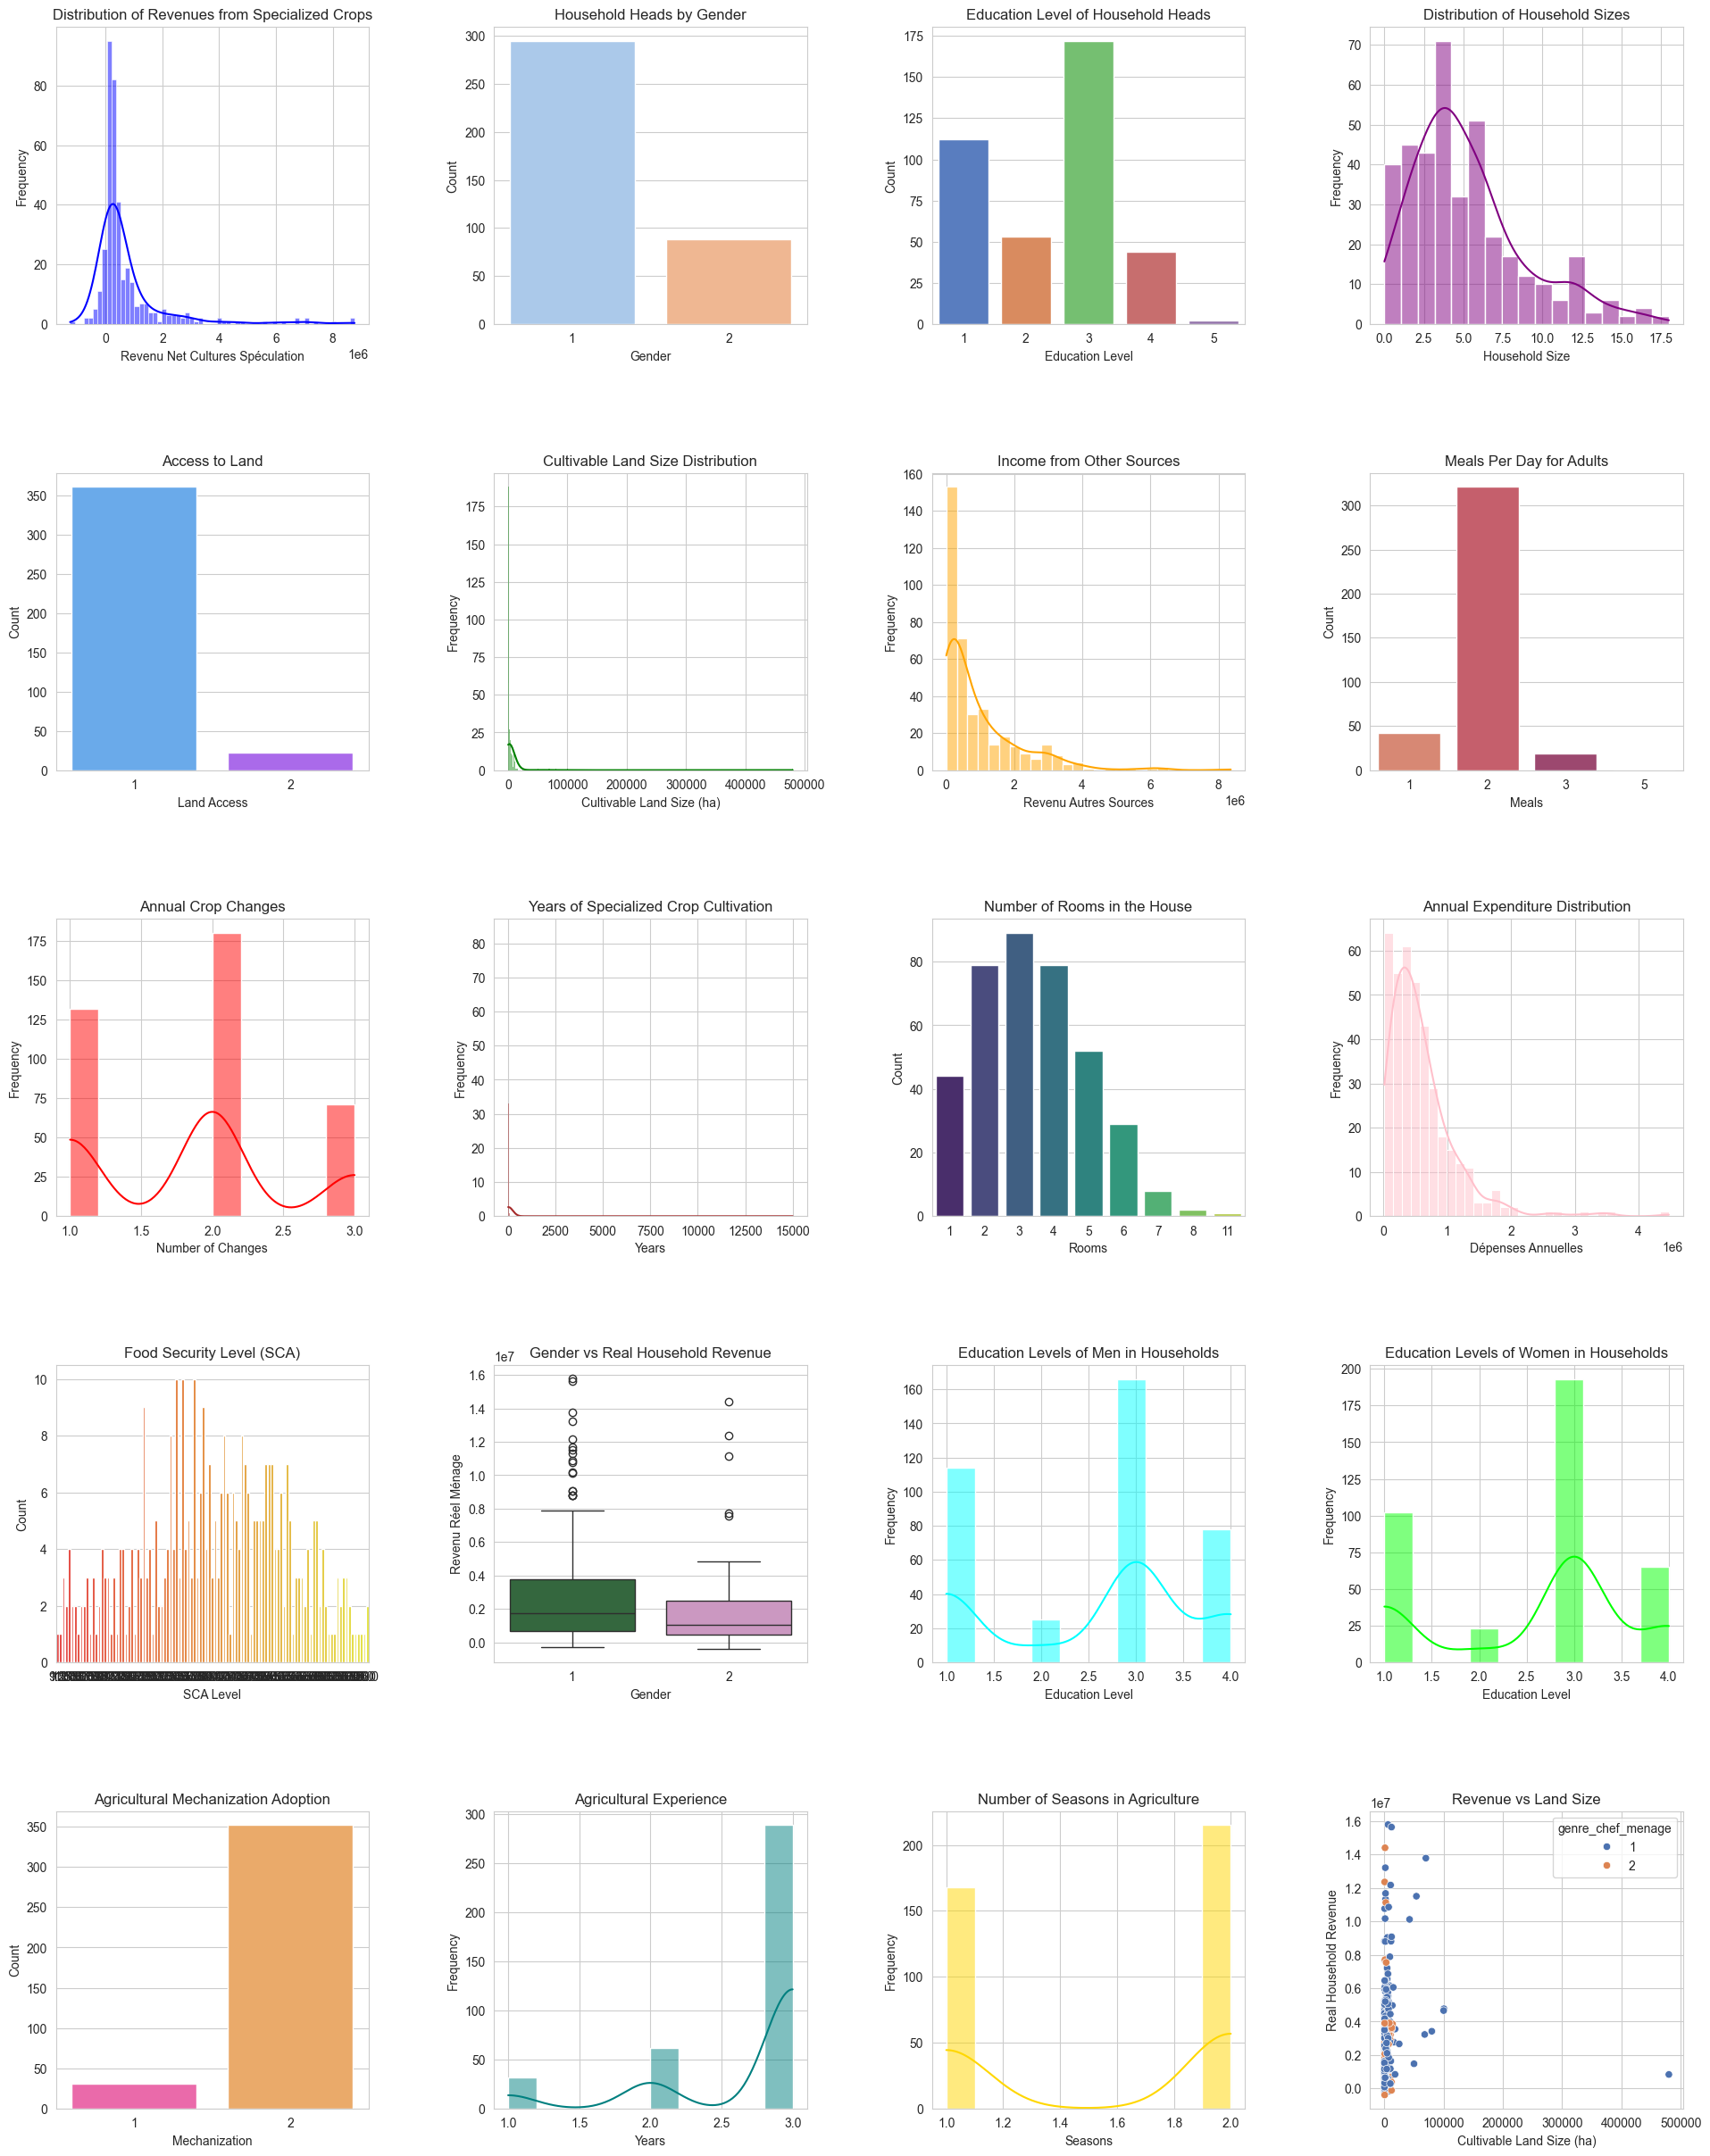

In [132]:
# Create subplots layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
fig.tight_layout(pad=5)

# Plot 1: Revenue vs revenu_net_cultures_speculation
sns.histplot(data=data, x='revenu_net_cultures_speculation', kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Revenues from Specialized Crops')
axes[0, 0].set_xlabel('Revenu Net Cultures Spéculation')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Gender Distribution
sns.countplot(data=data, x='genre_chef_menage', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Household Heads by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Plot 3: Education Level of Household Head
sns.countplot(data=data, x='niveau_chef_menage', palette='muted', ax=axes[0, 2])
axes[0, 2].set_title('Education Level of Household Heads')
axes[0, 2].set_xlabel('Education Level')
axes[0, 2].set_ylabel('Count')

# Plot 4: Household Size
sns.histplot(data=data, x='taille_menage', kde=True, color='purple', ax=axes[0, 3])
axes[0, 3].set_title('Distribution of Household Sizes')
axes[0, 3].set_xlabel('Household Size')
axes[0, 3].set_ylabel('Frequency')

# Plot 5: Land Access Distribution
sns.countplot(data=data, x='acces_terre', palette='cool', ax=axes[1, 0])
axes[1, 0].set_title('Access to Land')
axes[1, 0].set_xlabel('Land Access')
axes[1, 0].set_ylabel('Count')

# Plot 6: Cultivable Land Size
sns.histplot(data=data, x='superficie_cultivable', kde=True, color='green', ax=axes[1, 1])
axes[1, 1].set_title('Cultivable Land Size Distribution')
axes[1, 1].set_xlabel('Cultivable Land Size (ha)')
axes[1, 1].set_ylabel('Frequency')

# Plot 7: Income from Other Sources
sns.histplot(data=data, x='revenu_autres_sources_annuelles', kde=True, color='orange', ax=axes[1, 2])
axes[1, 2].set_title('Income from Other Sources')
axes[1, 2].set_xlabel('Revenu Autres Sources')
axes[1, 2].set_ylabel('Frequency')

# Plot 8: Meals Per Day (Adults)
sns.countplot(data=data, x='repas_adultes_jour', palette='flare', ax=axes[1, 3])
axes[1, 3].set_title('Meals Per Day for Adults')
axes[1, 3].set_xlabel('Meals')
axes[1, 3].set_ylabel('Count')

# Plot 9: Annual Crop Change
sns.histplot(data=data, x='cultures_annuelles_change', kde=True, color='red', ax=axes[2, 0])
axes[2, 0].set_title('Annual Crop Changes')
axes[2, 0].set_xlabel('Number of Changes')
axes[2, 0].set_ylabel('Frequency')

# Plot 10: Specialized Crop Years
sns.histplot(data=data, x='annees_production_speculation', kde=True, color='brown', ax=axes[2, 1])
axes[2, 1].set_title('Years of Specialized Crop Cultivation')
axes[2, 1].set_xlabel('Years')
axes[2, 1].set_ylabel('Frequency')

# Plot 11: Number of Rooms in the House
sns.countplot(data=data, x='nombre_pieces_logement', palette='viridis', ax=axes[2, 2])
axes[2, 2].set_title('Number of Rooms in the House')
axes[2, 2].set_xlabel('Rooms')
axes[2, 2].set_ylabel('Count')

# Plot 12: Annual Expenditure
sns.histplot(data=data, x='depenses_totales_annuelles', kde=True, color='pink', ax=axes[2, 3])
axes[2, 3].set_title('Annual Expenditure Distribution')
axes[2, 3].set_xlabel('Dépenses Annuelles')
axes[2, 3].set_ylabel('Frequency')

# Plot 13: Food Security (SCA)
sns.countplot(data=data, x='sca', palette='autumn', ax=axes[3, 0])
axes[3, 0].set_title('Food Security Level (SCA)')
axes[3, 0].set_xlabel('SCA Level')
axes[3, 0].set_ylabel('Count')

# Plot 14: Gender vs Household Revenue
sns.boxplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='cubehelix', ax=axes[3, 1])
axes[3, 1].set_title('Gender vs Real Household Revenue')
axes[3, 1].set_xlabel('Gender')
axes[3, 1].set_ylabel('Revenu Réel Ménage')

# Plot 15: Household Education Levels (Men)
sns.histplot(data=data, x='education_hommes', kde=True, color='cyan', ax=axes[3, 2])
axes[3, 2].set_title('Education Levels of Men in Households')
axes[3, 2].set_xlabel('Education Level')
axes[3, 2].set_ylabel('Frequency')

# Plot 16: Household Education Levels (Women)
sns.histplot(data=data, x='education_femmes', kde=True, color='lime', ax=axes[3, 3])
axes[3, 3].set_title('Education Levels of Women in Households')
axes[3, 3].set_xlabel('Education Level')
axes[3, 3].set_ylabel('Frequency')

# Plot 17: Agricultural Mechanization
sns.countplot(data=data, x='mecanisation', palette='spring', ax=axes[4, 0])
axes[4, 0].set_title('Agricultural Mechanization Adoption')
axes[4, 0].set_xlabel('Mechanization')
axes[4, 0].set_ylabel('Count')

# Plot 18: Experience in Agriculture
sns.histplot(data=data, x='experience_agricole', kde=True, color='teal', ax=axes[4, 1])
axes[4, 1].set_title('Agricultural Experience')
axes[4, 1].set_xlabel('Years')
axes[4, 1].set_ylabel('Frequency')

# Plot 19: Number of Seasons in Agriculture
sns.histplot(data=data, x='nombre_saisons', kde=True, color='gold', ax=axes[4, 2])
axes[4, 2].set_title('Number of Seasons in Agriculture')
axes[4, 2].set_xlabel('Seasons')
axes[4, 2].set_ylabel('Frequency')

# Plot 20: Revenue vs Land Size
sns.scatterplot(data=data, x='superficie_cultivable', y='revenu_reel_menage', hue='genre_chef_menage', palette='deep', ax=axes[4, 3])
axes[4, 3].set_title('Revenue vs Land Size')
axes[4, 3].set_xlabel('Cultivable Land Size (ha)')
axes[4, 3].set_ylabel('Real Household Revenue')

# Adjust spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2365175012.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


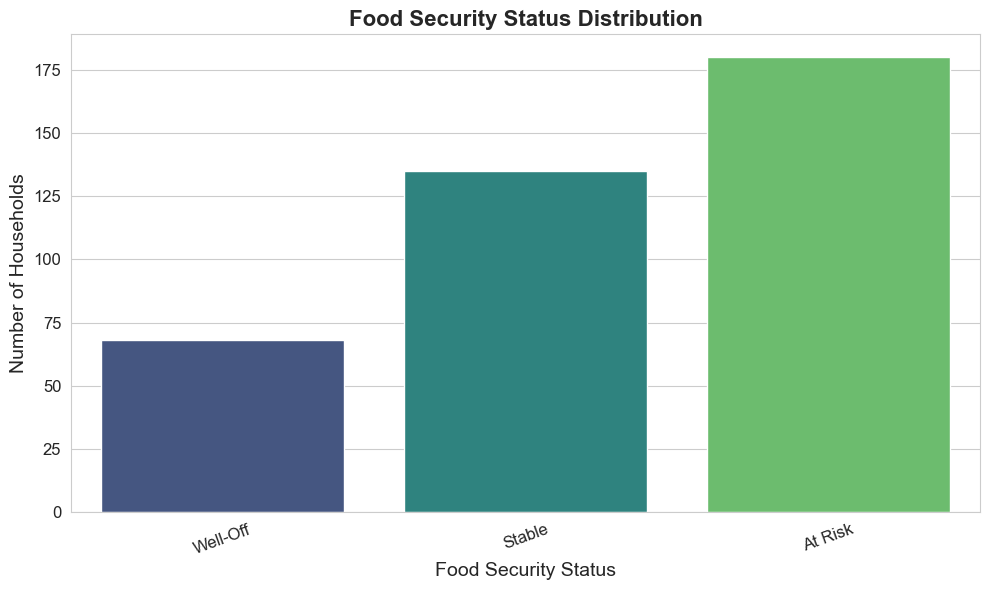

In [133]:
# Map values for better readability
security_labels = {1: 'Well-Off', 2: 'Stable', 3: 'At Risk'}
data['Classement_Label'] = data['security_index'].map(security_labels)

# Set up the figure
plt.figure(figsize=(10, 6))  # Slightly larger for better visualization

# Create the count plot
sns.countplot(
    data=data,
    x='Classement_Label',
    order=['Well-Off', 'Stable', 'At Risk'],
    palette='viridis'
)

# Add titles and labels with consistent formatting
plt.title('Food Security Status Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Food Security Status', fontsize=14)
plt.ylabel('Number of Households', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# Ensure layout is tight and display the plot
plt.tight_layout()
plt.show()


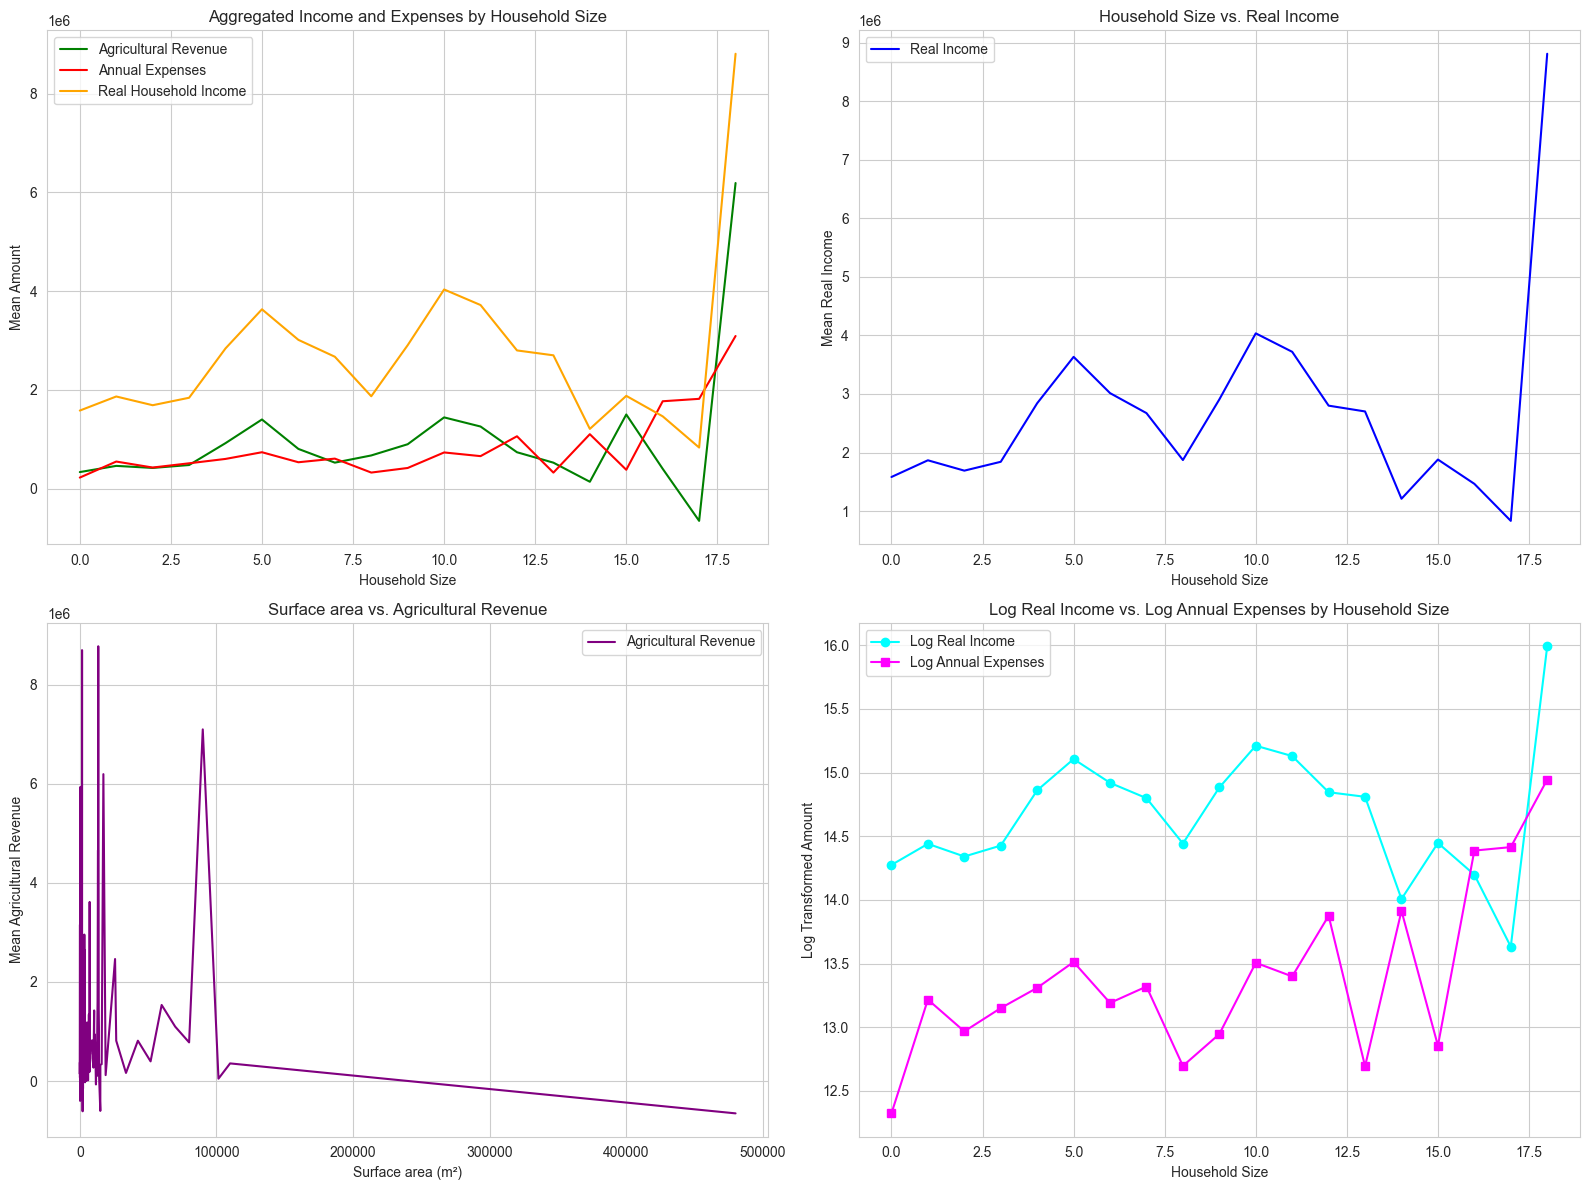

In [134]:
# Setting style
sns.set_style("whitegrid")
import numpy as np
#data.drop(columns=['CLassement_Label', axis=1])
# Aggregating data by household size for line plots
#drop Classement_Label
del data['Classement_Label']
agg_data = data.groupby('taille_menage').mean()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Aggregated Line Plot
axes[0, 0].plot(agg_data.index, agg_data['revenu_net_cultures_speculation'], label='Agricultural Revenue', color='green')
axes[0, 0].plot(agg_data.index, agg_data['depenses_totales_annuelles'], label='Annual Expenses', color='red')
axes[0, 0].plot(agg_data.index, agg_data['revenu_reel_menage'], label='Real Household Income', color='orange')
axes[0, 0].set_title('Aggregated Income and Expenses by Household Size')
axes[0, 0].set_xlabel('Household Size')
axes[0, 0].set_ylabel('Mean Amount')
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Line Plot: Real Income by Household Size
real_income_line = data.groupby('taille_menage')['revenu_reel_menage'].mean()
axes[0, 1].plot(real_income_line.index, real_income_line.values, label='Real Income', color='blue')
axes[0, 1].set_title('Household Size vs. Real Income')
axes[0, 1].set_xlabel('Household Size')
axes[0, 1].set_ylabel('Mean Real Income')
axes[0, 1].legend()
axes[0, 1].grid(True)

# 3. Line Plot: Cultivable Land Size vs. Agricultural Revenue
land_revenue = data.groupby('superficie_totale_terre')['revenu_net_cultures_speculation'].mean()
axes[1, 0].plot(land_revenue.index, land_revenue.values, label='Agricultural Revenue', color='purple')
axes[1, 0].set_title('Surface area vs. Agricultural Revenue')
axes[1, 0].set_xlabel('Surface area (m²)')
axes[1, 0].set_ylabel('Mean Agricultural Revenue')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Line Plot: Log Real Income vs. Log Annual Expenses
# Aggregating by household size (or another meaningful grouping variable)
log_income = np.log1p(data.groupby('taille_menage')['revenu_reel_menage'].mean())
log_expenses = np.log1p(data.groupby('taille_menage')['depenses_totales_annuelles'].mean())

# Line plot
axes[1, 1].plot(log_income.index, log_income.values, label='Log Real Income', color='cyan', marker='o')
axes[1, 1].plot(log_expenses.index, log_expenses.values, label='Log Annual Expenses', color='magenta', marker='s')

# Titles and labels
axes[1, 1].set_title('Log Real Income vs. Log Annual Expenses by Household Size')
axes[1, 1].set_xlabel('Household Size')
axes[1, 1].set_ylabel('Log Transformed Amount')
axes[1, 1].legend()

# Adding grid for clarity
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()



C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1881361350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')


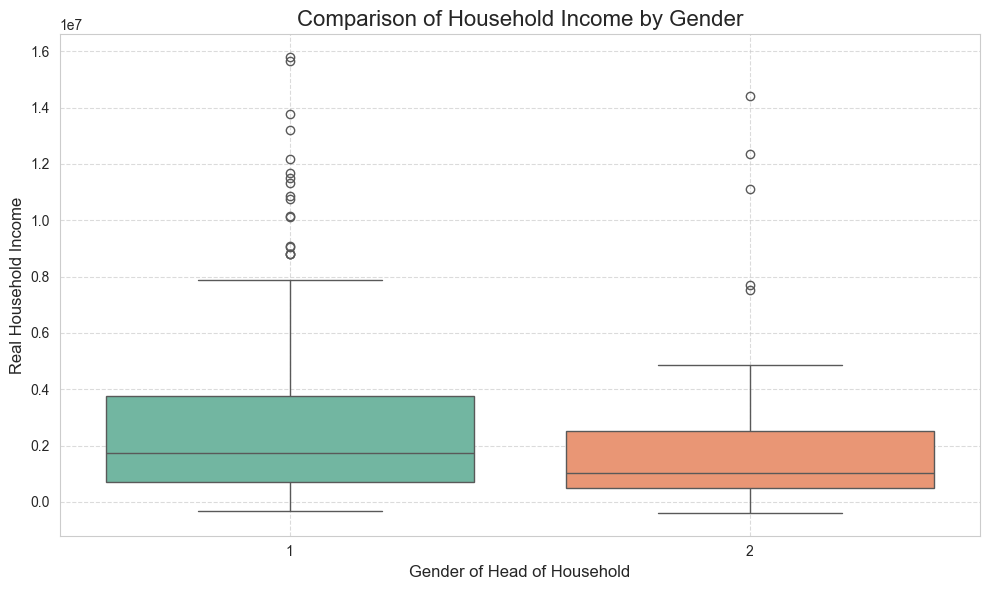

In [135]:
plt.figure(figsize=(10, 6))

# Boxplot to compare household income for different genders
sns.boxplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Household Income by Gender', fontsize=16)
plt.xlabel('Gender of Head of Household', fontsize=12)
plt.ylabel('Real Household Income', fontsize=12)

# Display grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2237402726.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')


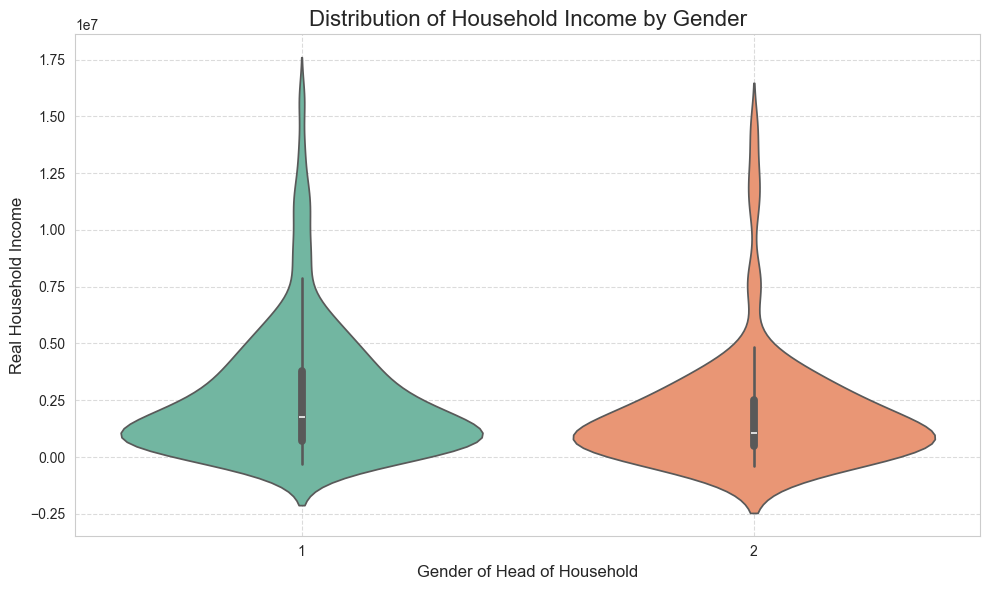

In [136]:
plt.figure(figsize=(10, 6))

# Violin plot to compare household income for different genders
sns.violinplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')

# Adding titles and labels
plt.title('Distribution of Household Income by Gender', fontsize=16)
plt.xlabel('Gender of Head of Household', fontsize=12)
plt.ylabel('Real Household Income', fontsize=12)

# Display grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


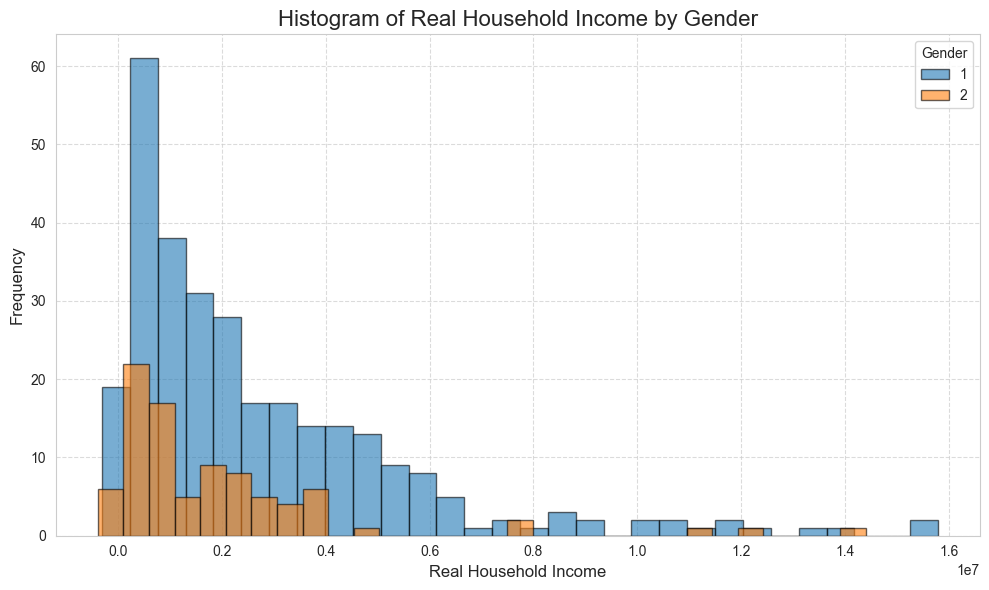

In [137]:
plt.figure(figsize=(10, 6))

# Plot histograms for each gender
genders = data['genre_chef_menage'].unique()
for gender in genders:
    subset = data[data['genre_chef_menage'] == gender]
    plt.hist(subset['revenu_reel_menage'], bins=30, alpha=0.6, label=f'{gender}', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Real Household Income by Gender', fontsize=16)
plt.xlabel('Real Household Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add legend to distinguish genders
plt.legend(title='Gender')

# Display grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


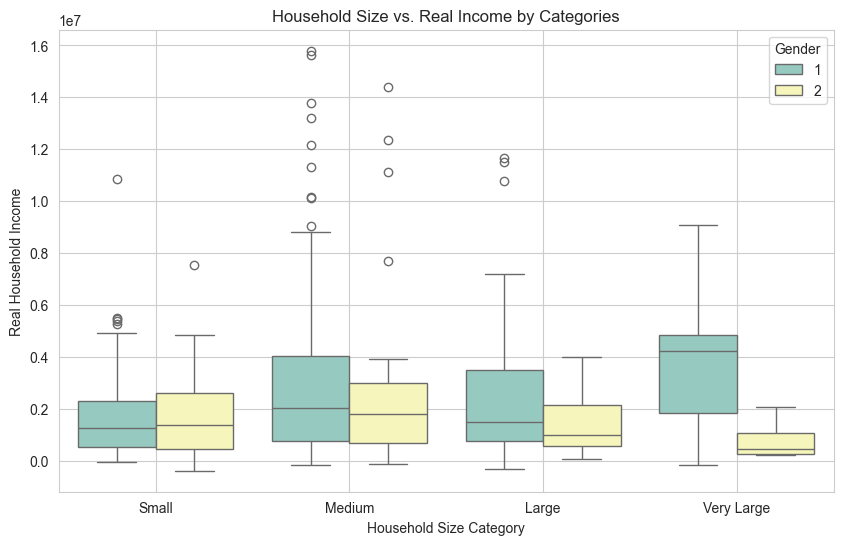

In [138]:
# Binning household sizes into groups
data['taille_menage_bin'] = pd.cut(
    data['taille_menage'], 
    bins=[0, 3, 6, 9, 12], 
    labels=['Small', 'Medium', 'Large', 'Very Large']
)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, 
    x='taille_menage_bin', 
    y='revenu_reel_menage', 
    hue='genre_chef_menage', 
    palette='Set3'
)
plt.title('Household Size vs. Real Income by Categories')
plt.xlabel('Household Size Category')
plt.ylabel('Real Household Income')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


## Analysis

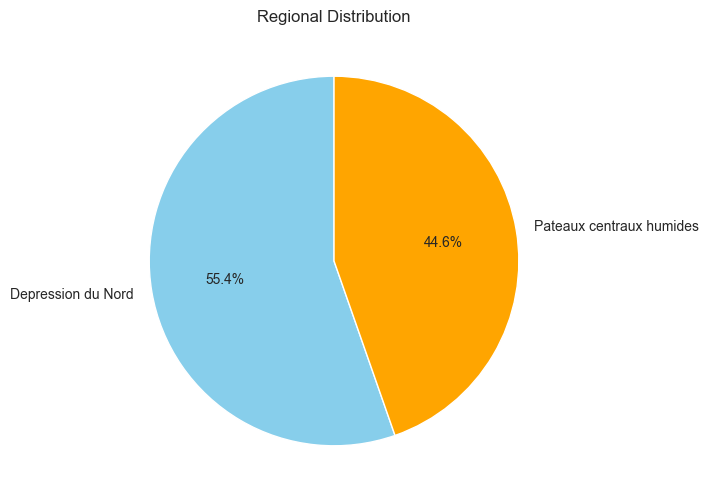

In [139]:


# Count the occurrences of each region
region_counts = data['zme'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
region_counts.plot.pie(autopct='%1.1f%%', labels=['Depression du Nord', 'Pateaux centraux humides'], startangle=90, colors=['skyblue', 'orange'])
plt.title('Regional Distribution')
plt.ylabel('')  # Remove the default ylabel
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1632135589.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_security, x='genre_chef_menage', y='security_index', palette='viridis')


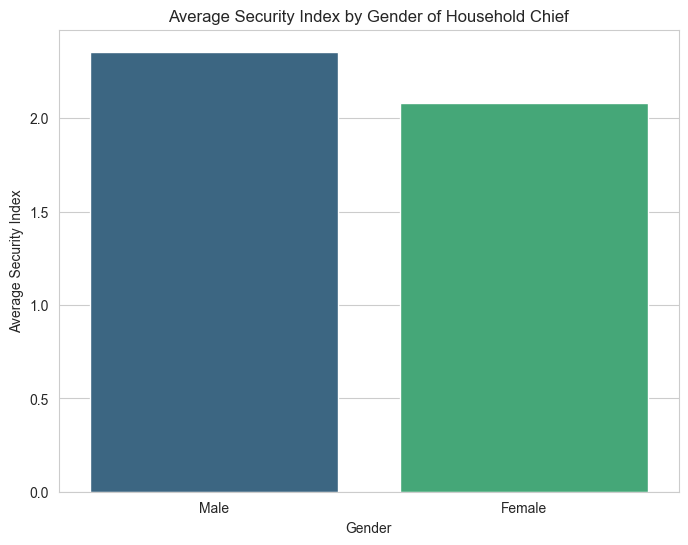

In [140]:
# Group data by gender and calculate mean security index
gender_security = data.groupby('genre_chef_menage')['security_index'].mean().reset_index()

# Map numeric values to labels for gender
gender_security['genre_chef_menage'] = gender_security['genre_chef_menage'].map({1: 'Male', 2: 'Female'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_security, x='genre_chef_menage', y='security_index', palette='viridis')
plt.title('Average Security Index by Gender of Household Chief')
plt.xlabel('Gender')
plt.ylabel('Average Security Index')
plt.show()


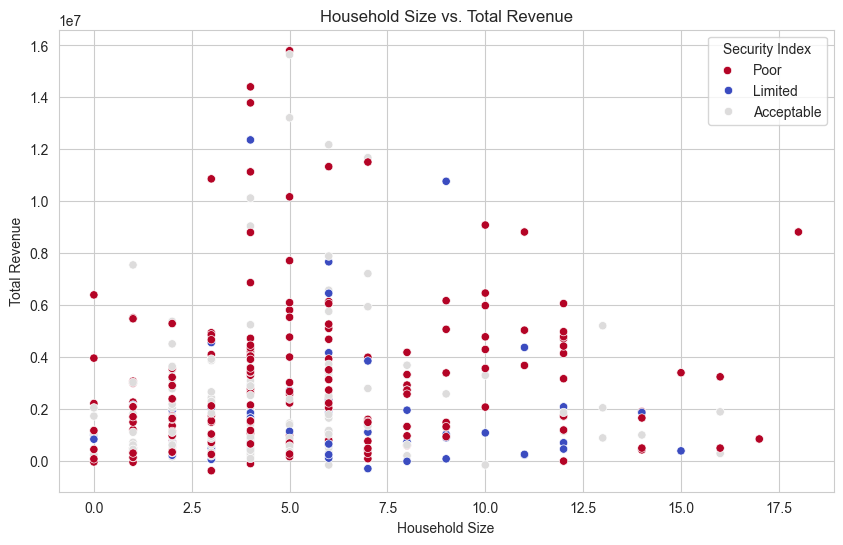

In [141]:
# Scatter plot of household size and total revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='taille_menage', y='revenu_reel_menage', hue='security_index', palette='coolwarm')
plt.title('Household Size vs. Total Revenue')
plt.xlabel('Household Size')
plt.ylabel('Total Revenue')
plt.legend(title='Security Index', labels=['Poor', 'Limited', 'Acceptable'])
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3378403322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='niveau_chef_menage_label', y='security_index', palette='Set3')


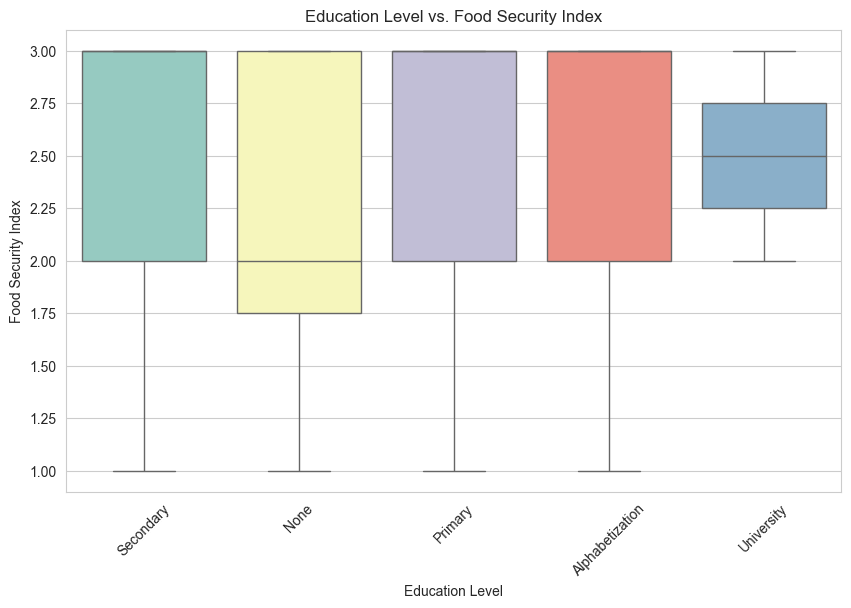

In [142]:
# Map education levels for readability, without changing the original 'niveau_chef_menage'
data['niveau_chef_menage_label'] = data['niveau_chef_menage'].map({
    1: 'None', 2: 'Alphabetization', 3: 'Primary', 4: 'Secondary', 5: 'University'
})

# Box plot using the new 'niveau_chef_menage_label' for labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='niveau_chef_menage_label', y='security_index', palette='Set3')
plt.title('Education Level vs. Food Security Index')
plt.xlabel('Education Level')
plt.ylabel('Food Security Index')
plt.xticks(rotation=45)
plt.show()


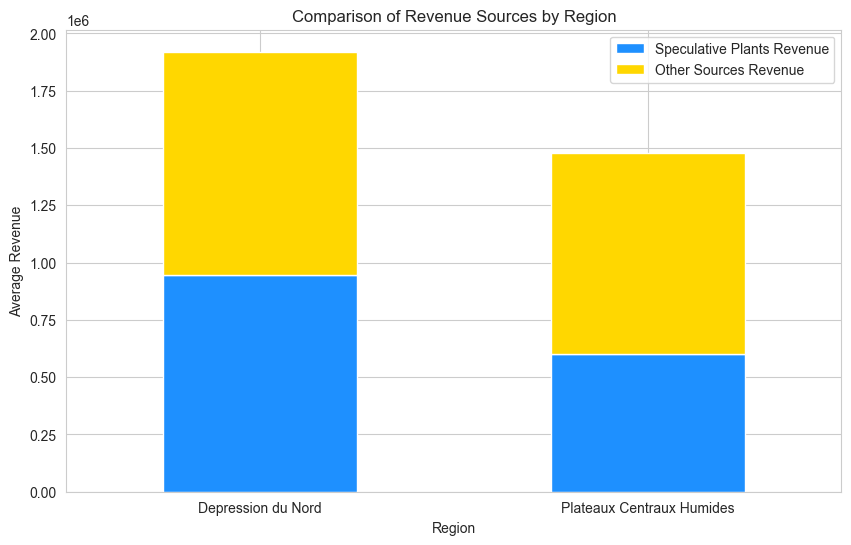

In [143]:
# Aggregate total revenues by region
revenue_sources = data.groupby('zme')[['revenu_net_cultures_speculation', 'revenu_autres_sources_annuelles']].mean()

# Plot
revenue_sources.plot(kind='bar', stacked=True, figsize=(10, 6), color=['dodgerblue', 'gold'])
plt.title('Comparison of Revenue Sources by Region')
plt.xlabel('Region')
plt.ylabel('Average Revenue')
plt.xticks(ticks=[0, 1], labels=['Depression du Nord', 'Plateaux Centraux Humides'], rotation=0)
plt.legend(['Speculative Plants Revenue', 'Other Sources Revenue'])
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3262825973.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=crop_revenues, x='Crop', y='Revenue', palette='muted', scale='width')
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3262825973.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=crop_revenues, x='Crop', y='Revenue', palette='muted', scale='width')


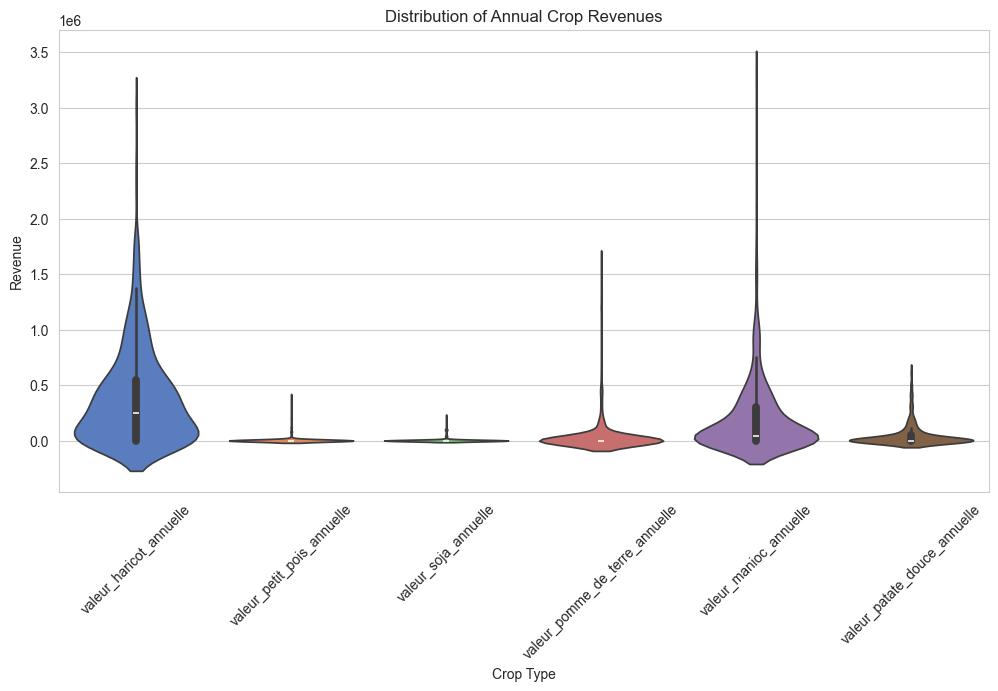

In [144]:
# Select crop revenue columns
crop_columns = [
    'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 'valeur_soja_annuelle',
    'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle', 'valeur_patate_douce_annuelle'
]

# Combine data into a single DataFrame for visualization
crop_revenues = data[crop_columns].melt(var_name='Crop', value_name='Revenue')

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=crop_revenues, x='Crop', y='Revenue', palette='muted', scale='width')
plt.title('Distribution of Annual Crop Revenues')
plt.xlabel('Crop Type')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


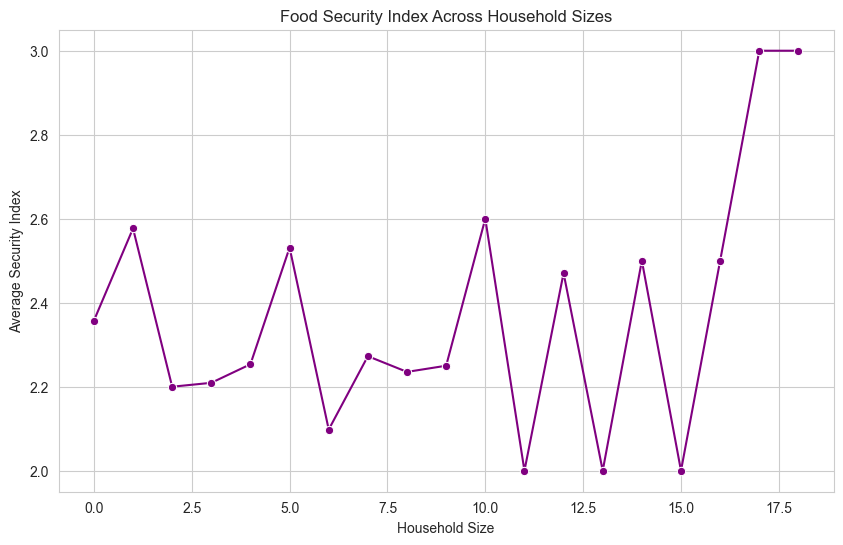

In [145]:
# Calculate mean security index by household size
household_security = data.groupby('taille_menage')['security_index'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=household_security, x='taille_menage', y='security_index', marker='o', color='purple')
plt.title('Food Security Index Across Household Sizes')
plt.xlabel('Household Size')
plt.ylabel('Average Security Index')
plt.grid(True)
plt.show()


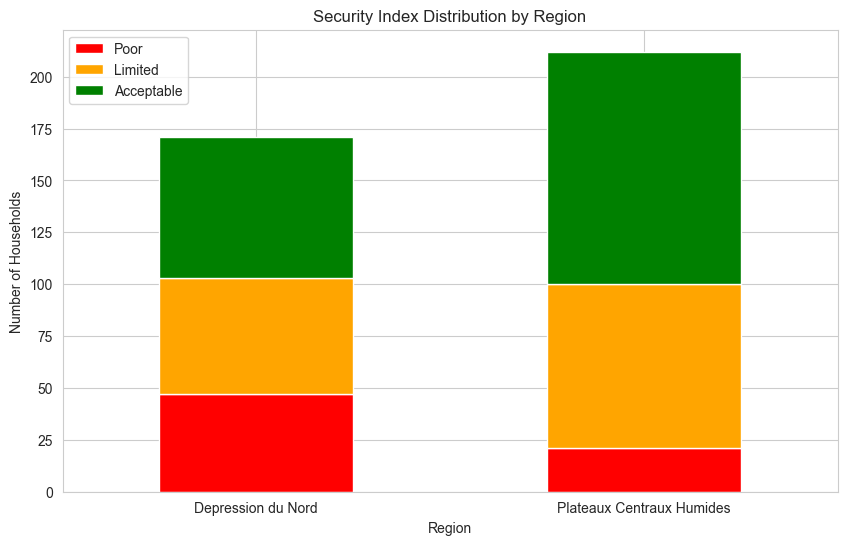

In [146]:
# Analyze the distribution of security index across regions (ZME)
security_by_region = data.groupby('zme')['security_index'].value_counts().unstack().fillna(0)

# Plot a stacked bar chart
security_by_region.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'orange', 'green'])
plt.title('Security Index Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Households')
plt.xticks(ticks=[0, 1], labels=['Depression du Nord', 'Plateaux Centraux Humides'], rotation=0)
plt.legend(['Poor', 'Limited', 'Acceptable'])
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1543504925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='security_index', y='revenu_reel_menage', palette='coolwarm')


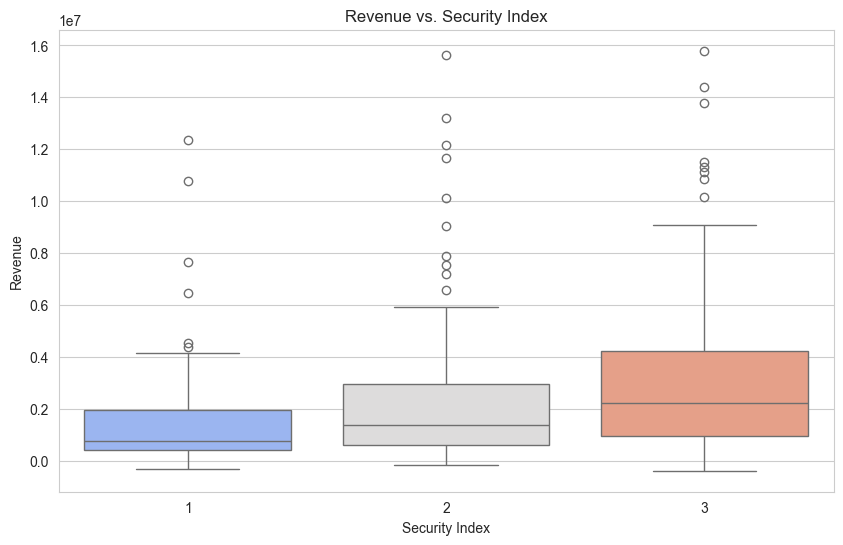

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1543504925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='security_index', y='taille_menage', palette='coolwarm')


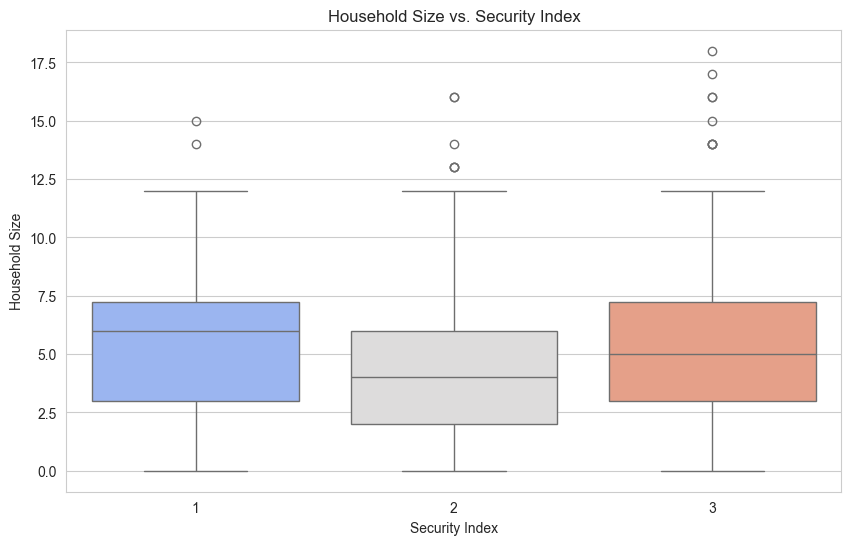

In [147]:
# Box plot comparing security index vs. revenue
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='security_index', y='revenu_reel_menage', palette='coolwarm')
plt.title('Revenue vs. Security Index')
plt.xlabel('Security Index')
plt.ylabel('Revenue')
plt.show()

# Box plot comparing security index vs. household size
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='security_index', y='taille_menage', palette='coolwarm')
plt.title('Household Size vs. Security Index')
plt.xlabel('Security Index')
plt.ylabel('Household Size')
plt.show()


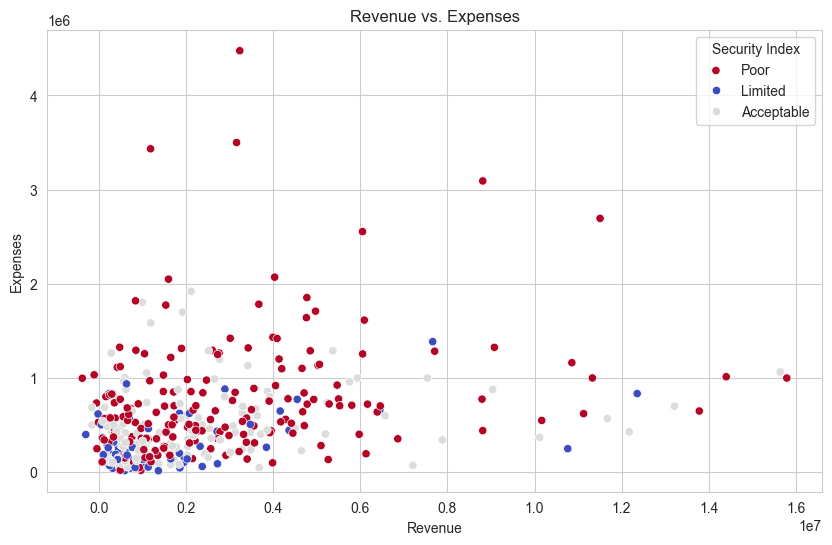

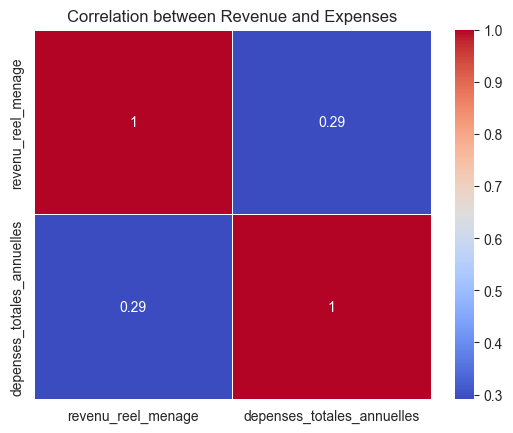

In [148]:
# Scatter plot of revenue vs. expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='revenu_reel_menage', y='depenses_totales_annuelles', hue='security_index', palette='coolwarm')
plt.title('Revenue vs. Expenses')
plt.xlabel('Revenue')
plt.ylabel('Expenses')
plt.legend(title='Security Index', labels=['Poor', 'Limited', 'Acceptable'])
plt.show()

# Correlation heatmap between revenue and expenses
corr_matrix = data[['revenu_reel_menage', 'depenses_totales_annuelles']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Revenue and Expenses')
plt.show()


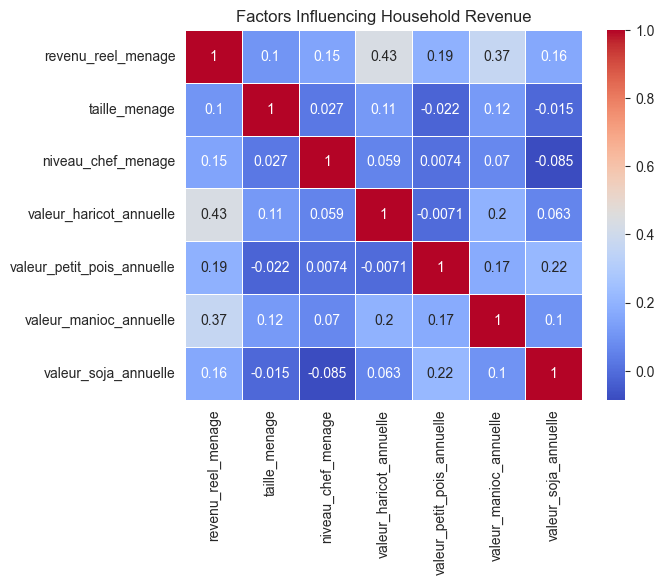

In [149]:
# Correlation heatmap with other factors that might influence revenue
revenue_factors = data[['revenu_reel_menage', 'taille_menage', 'niveau_chef_menage', 
                      'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 
                      'valeur_manioc_annuelle', 'valeur_soja_annuelle']]
                    


corr_matrix = revenue_factors.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Factors Influencing Household Revenue')
plt.show()


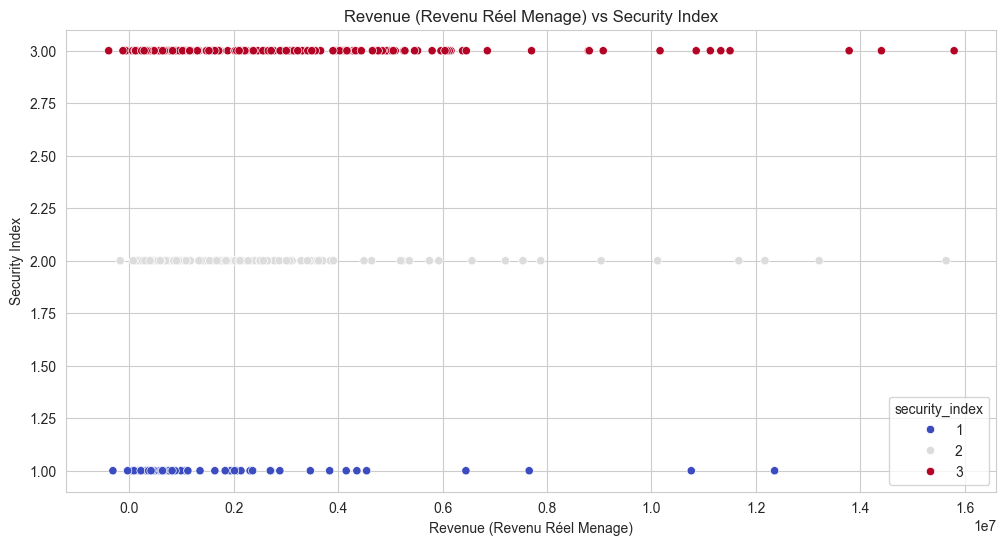

In [150]:
# Plot the relationship between revenu_reel_menage (total revenue) and security index
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='revenu_reel_menage', y='security_index', hue='security_index', palette='coolwarm')
plt.title('Revenue (Revenu Réel Menage) vs Security Index')
plt.xlabel('Revenue (Revenu Réel Menage)')
plt.ylabel('Security Index')
plt.show()


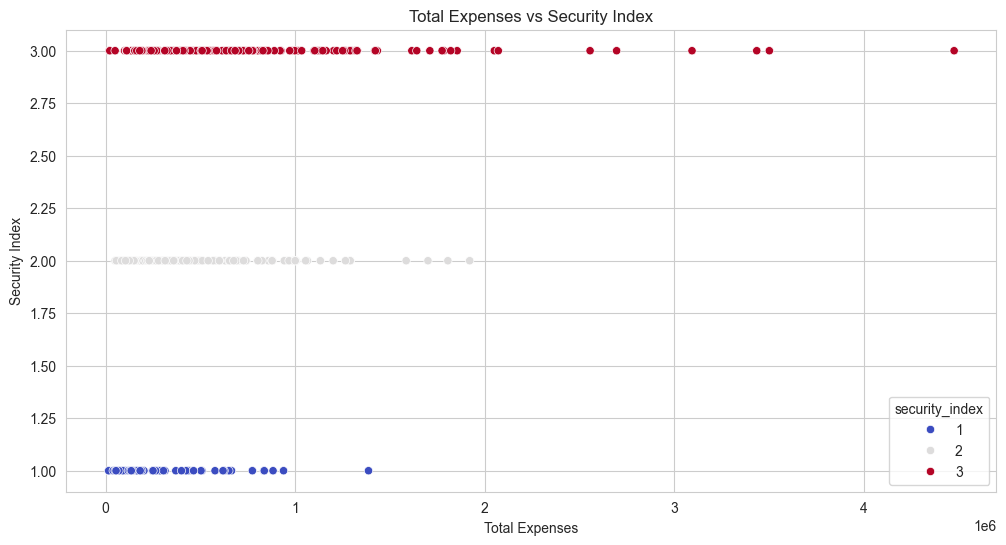

In [151]:
# Plot the relationship between total expenses and security index
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='depenses_totales_annuelles', y='security_index', hue='security_index', palette='coolwarm')
plt.title('Total Expenses vs Security Index')
plt.xlabel('Total Expenses')
plt.ylabel('Security Index')
plt.show()


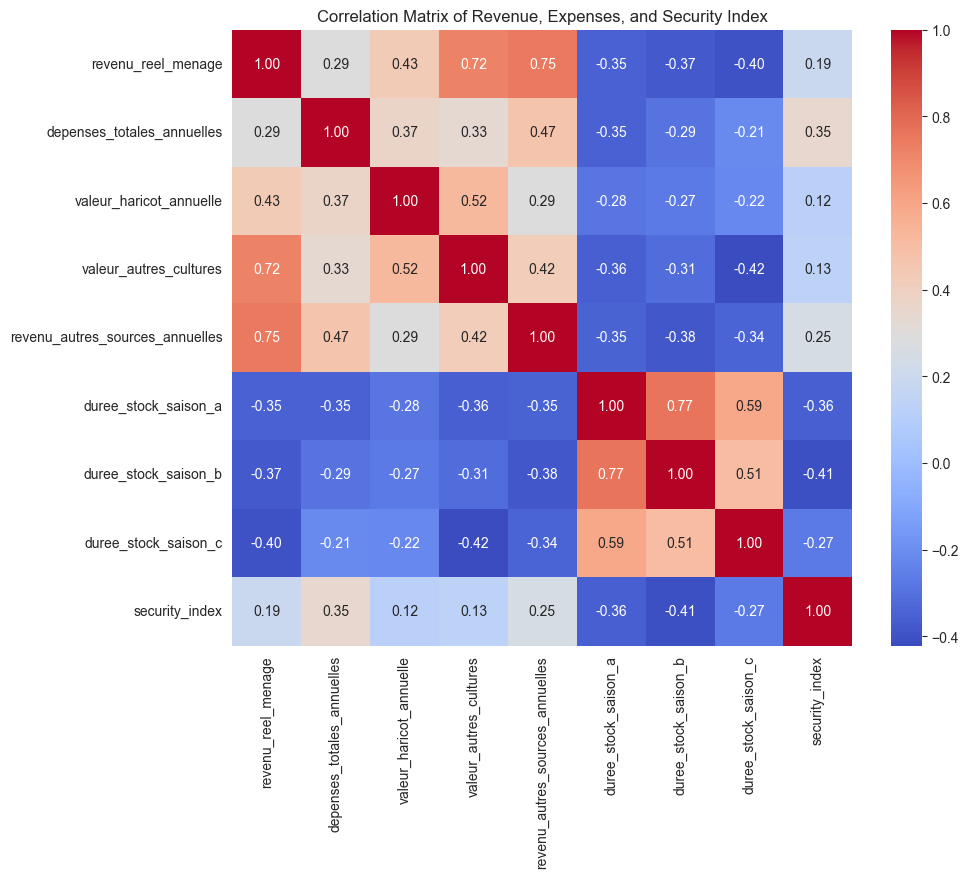

In [152]:
# Compute the correlation matrix for the relevant columns
correlation_matrix = data[['revenu_reel_menage', 'depenses_totales_annuelles', 'valeur_haricot_annuelle', 
                           'valeur_autres_cultures', 'revenu_autres_sources_annuelles','duree_stock_saison_a', 'duree_stock_saison_b',
    'duree_stock_saison_c', 'security_index']].corr()


# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Revenue, Expenses, and Security Index')
plt.show()


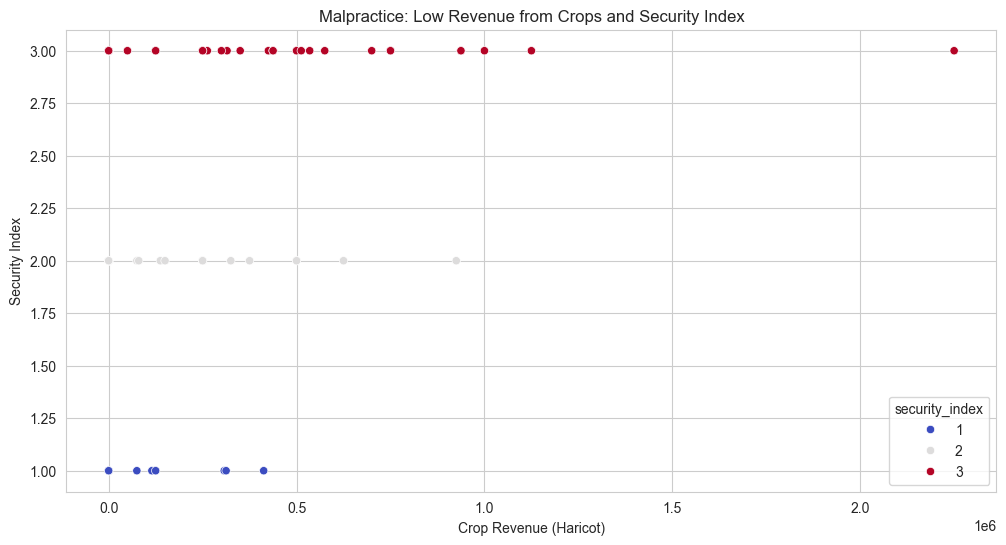

In [153]:
# Filter households with high expenses but low revenue
malpractices = data[data['depenses_totales_annuelles'] > data['revenu_reel_menage']]

# Investigate the relationship between crop revenue (haricot) and security index for these households
plt.figure(figsize=(12, 6))
sns.scatterplot(data=malpractices, x='valeur_haricot_annuelle', y='security_index', hue='security_index', palette='coolwarm')
plt.title('Malpractice: Low Revenue from Crops and Security Index')
plt.xlabel('Crop Revenue (Haricot)')
plt.ylabel('Security Index')
plt.show()


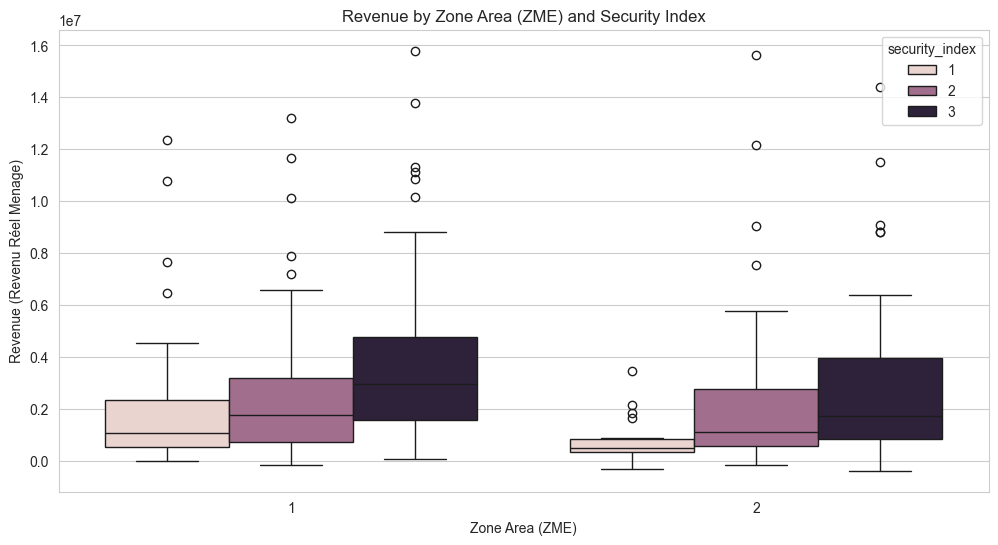

In [154]:
# Boxplot to compare revenu_reel_menage and security_index by ZME (Zone Area)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='zme', y='revenu_reel_menage', hue='security_index')
plt.title('Revenue by Zone Area (ZME) and Security Index')
plt.xlabel('Zone Area (ZME)')
plt.ylabel('Revenue (Revenu Réel Menage)')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


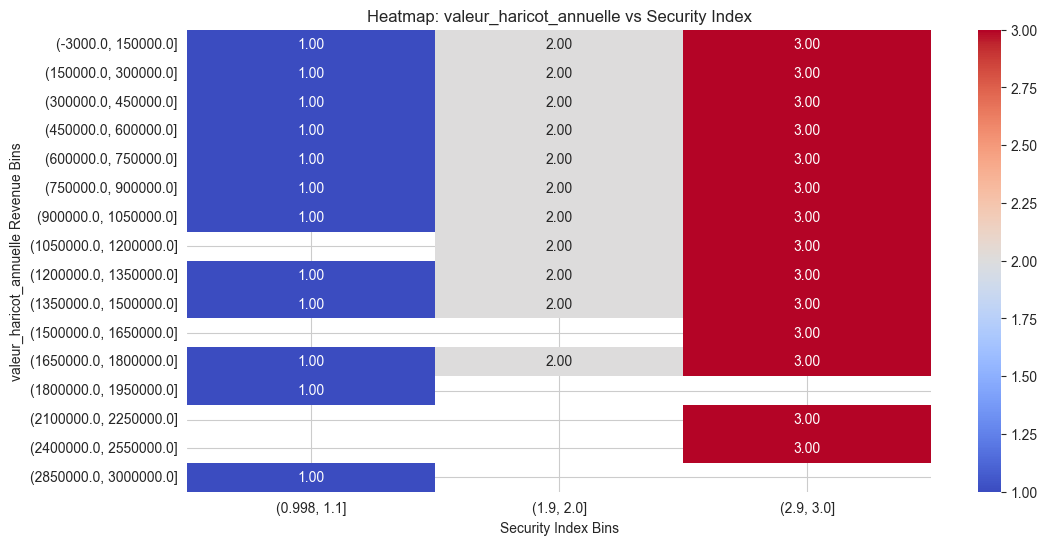

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


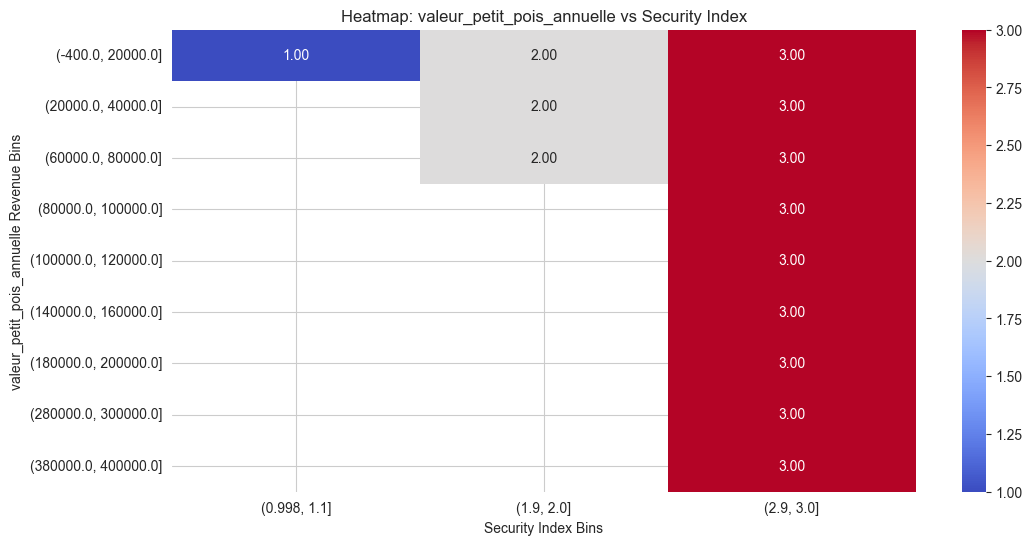

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


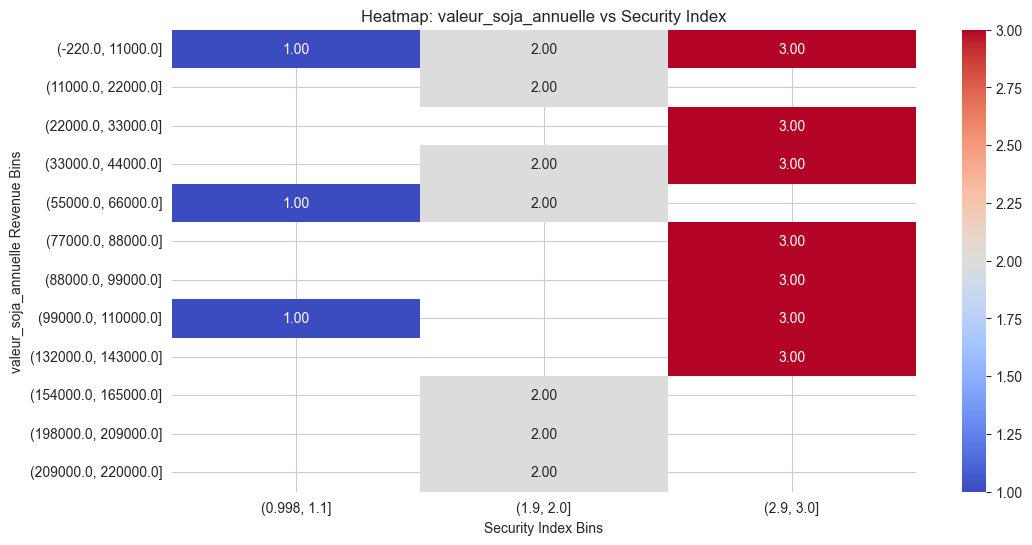

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


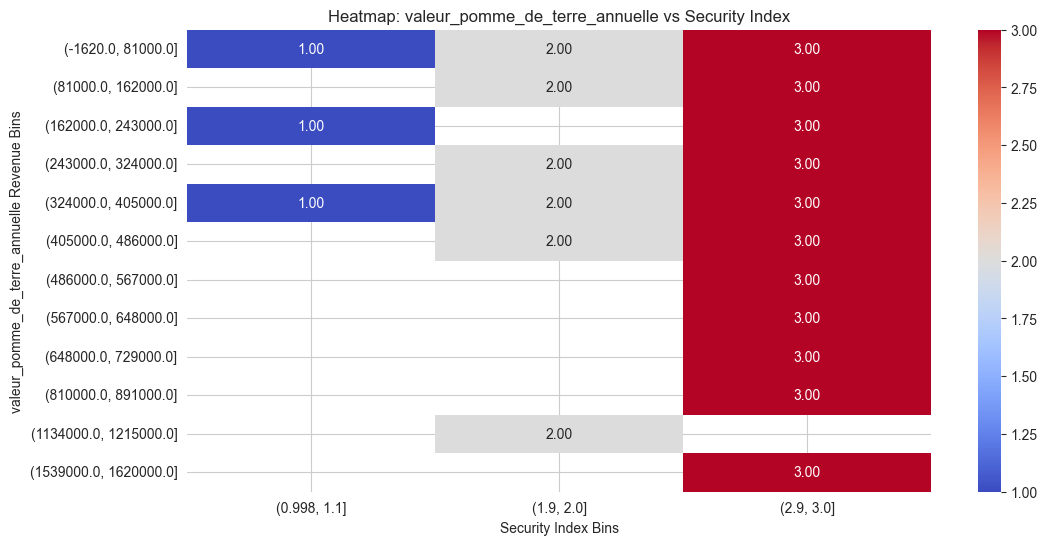

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


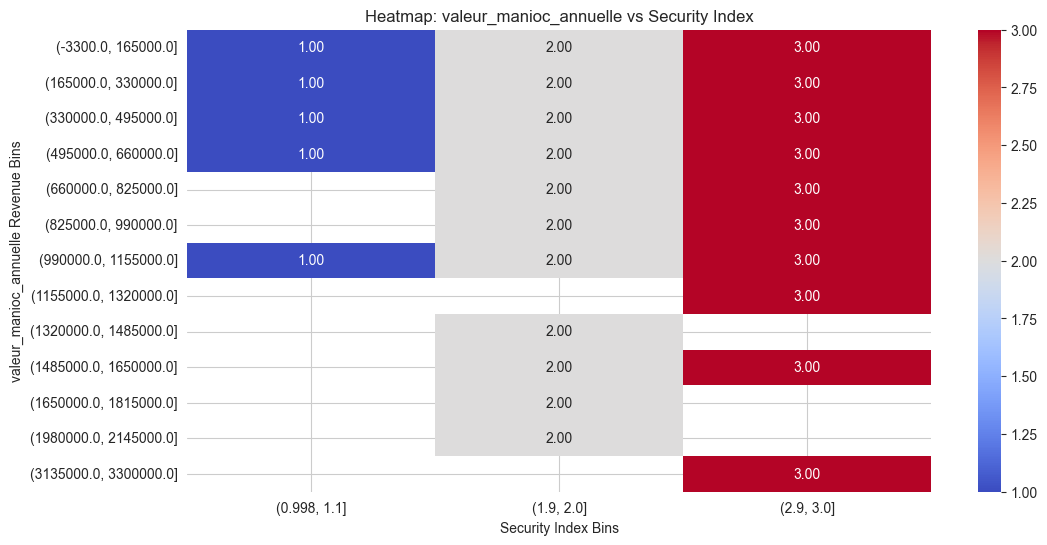

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


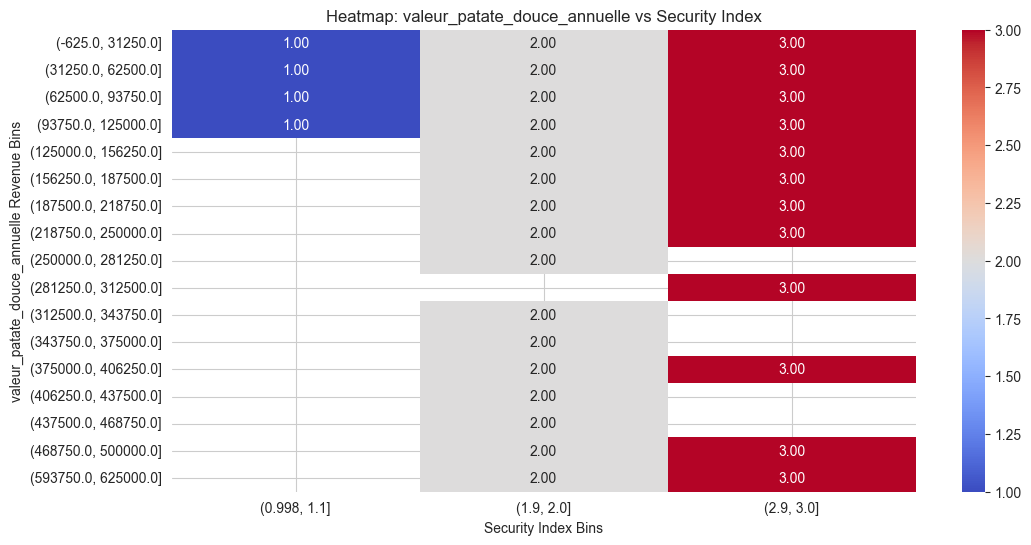

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


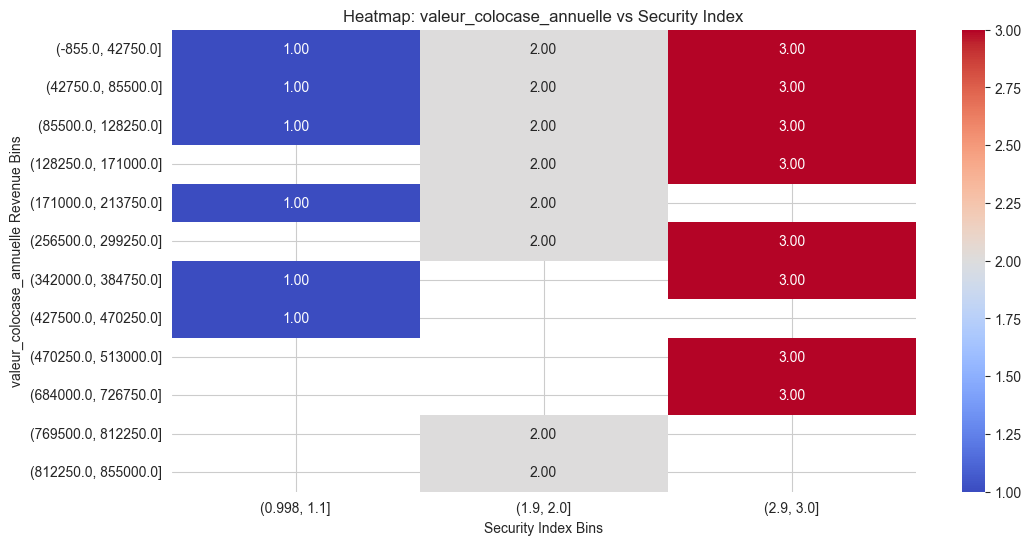

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


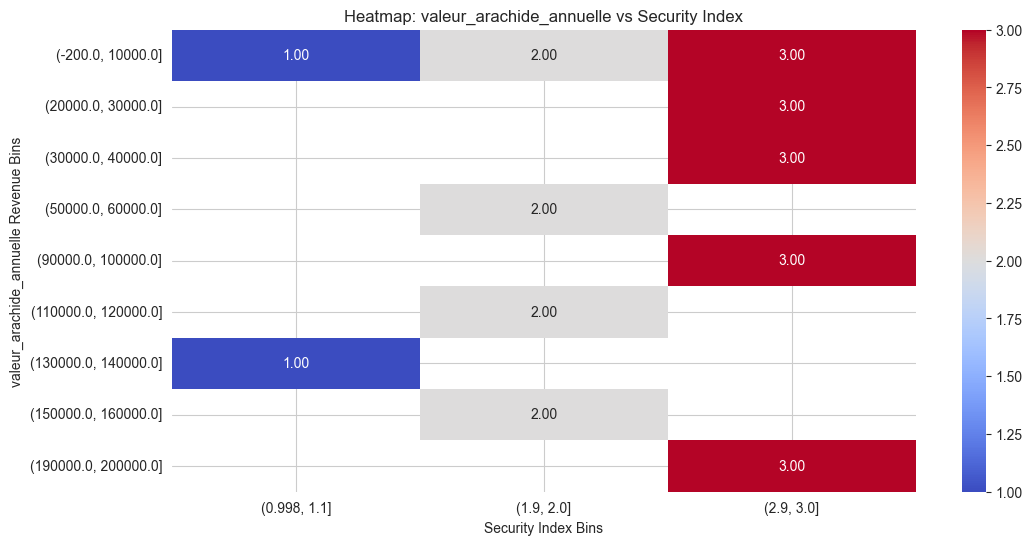

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


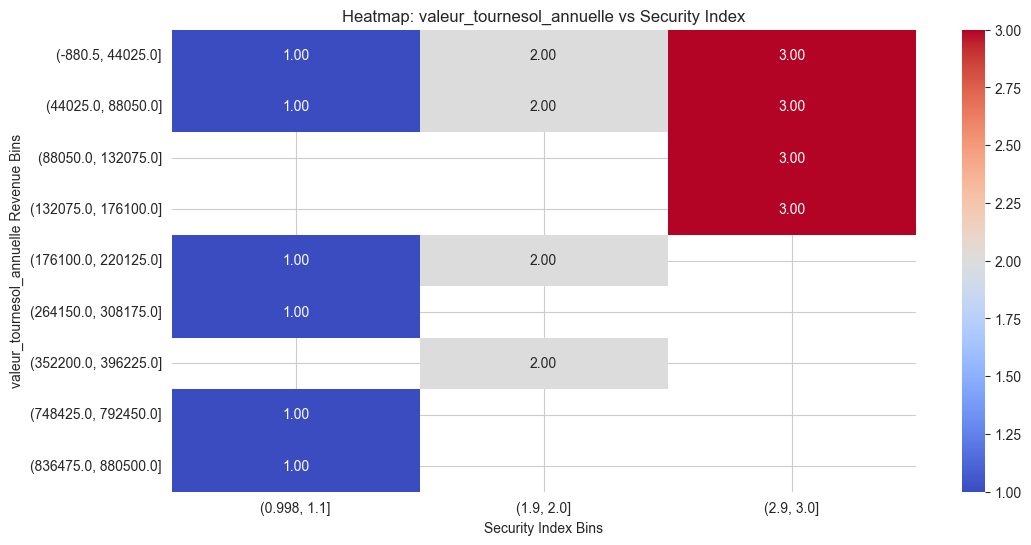

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


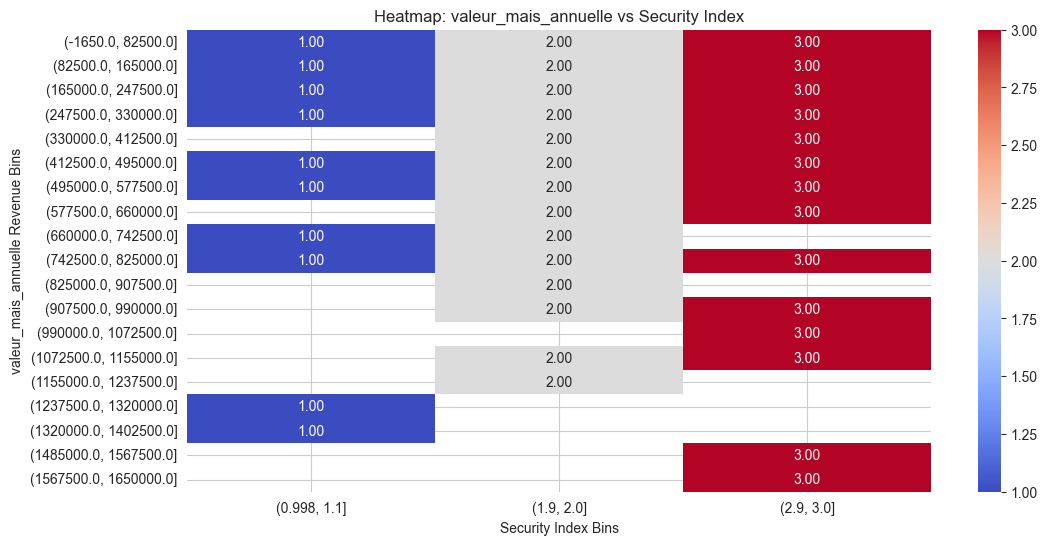

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


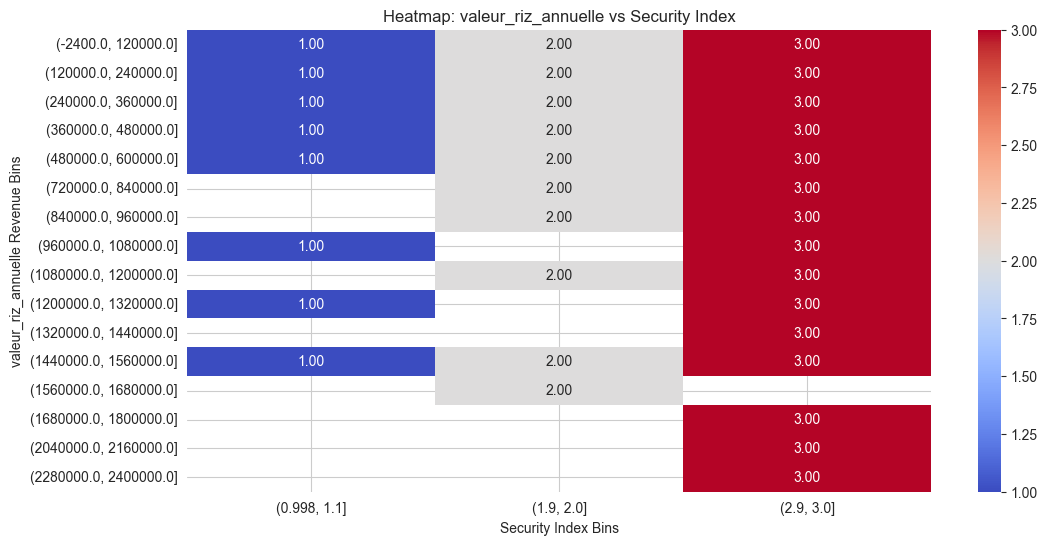

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


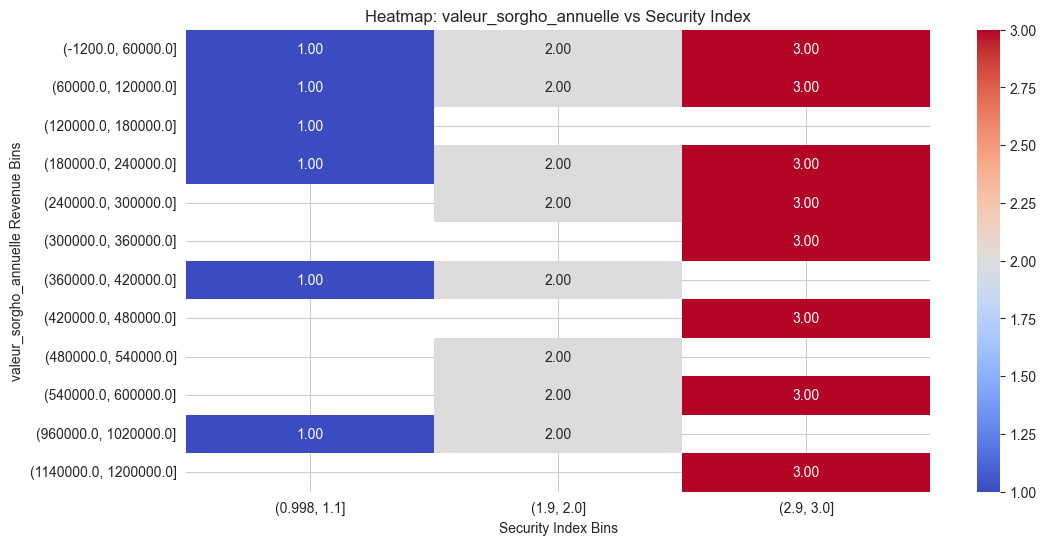

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


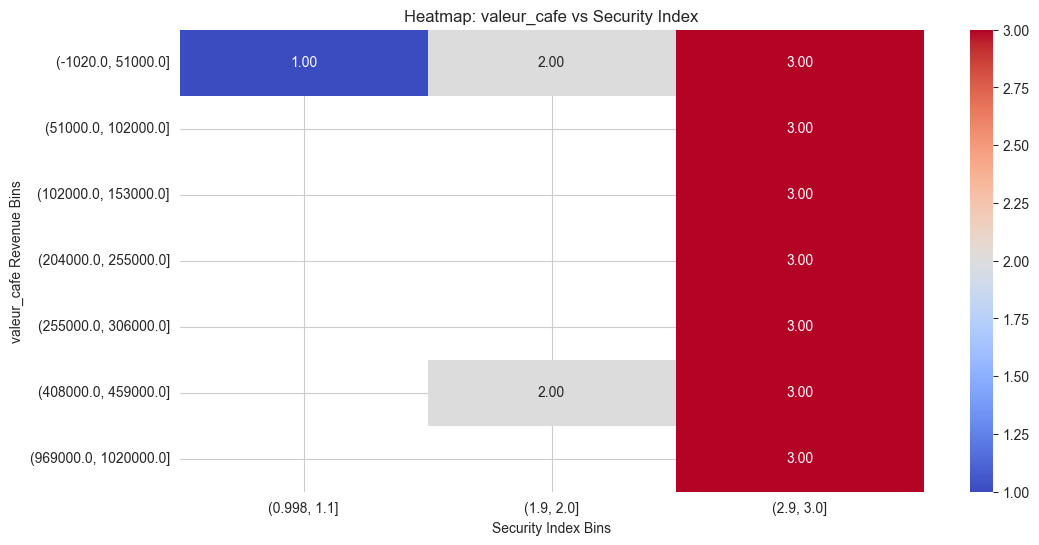

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


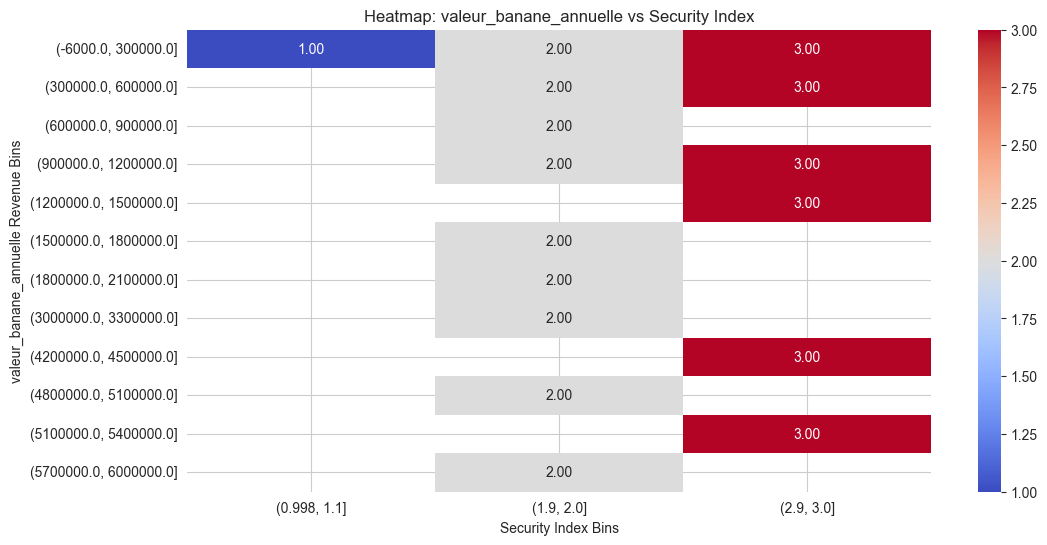

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


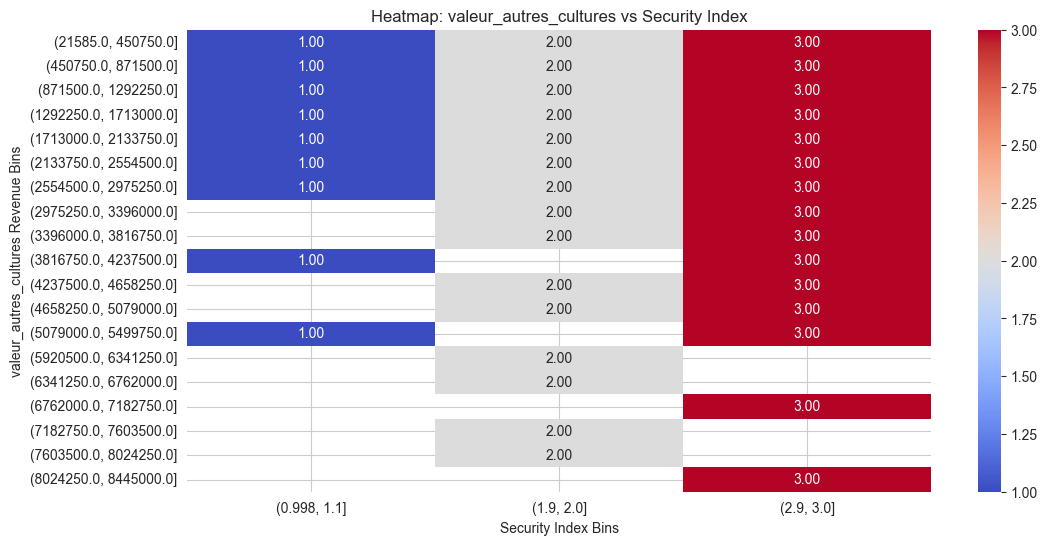

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2569634657.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',


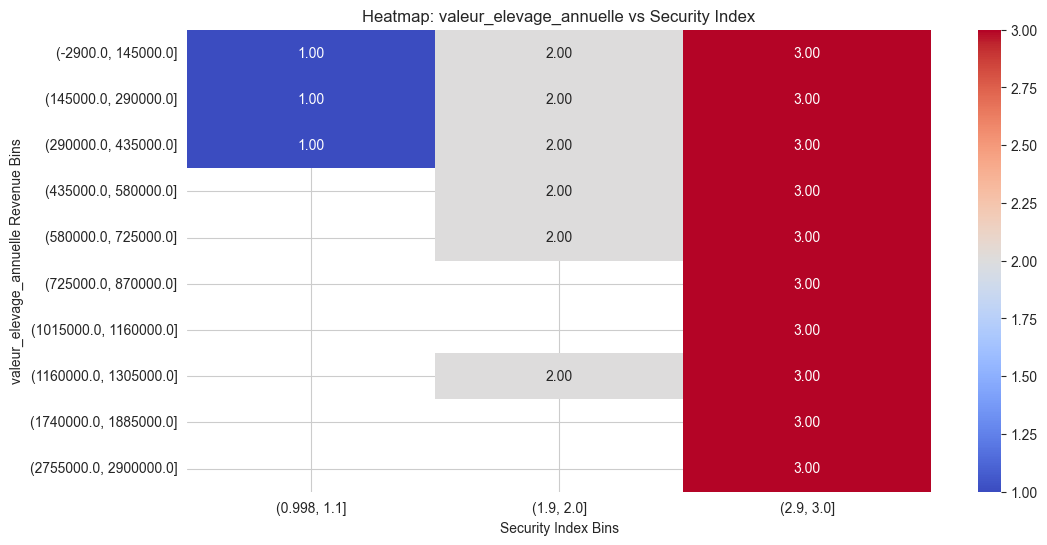

In [155]:
# List of crop revenue columns (You can add or modify as needed)
crop_revenue_columns = [
    'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 'valeur_soja_annuelle',
    'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle', 'valeur_patate_douce_annuelle',
    'valeur_colocase_annuelle', 'valeur_arachide_annuelle', 'valeur_tournesol_annuelle',
    'valeur_mais_annuelle', 'valeur_riz_annuelle', 'valeur_sorgho_annuelle', 
    'valeur_cafe', 'valeur_banane_annuelle', 'valeur_autres_cultures', 'valeur_elevage_annuelle'
]

# Loop through each crop revenue column and create heatmaps
for crop_column in crop_revenue_columns:
    # Create a 2D histogram and plot it as a heatmap
    heatmap_data = pd.pivot_table(data, values='security_index', 
                                  index=pd.cut(data[crop_column], bins=20), 
                                  columns=pd.cut(data['security_index'], bins=20), 
                                  aggfunc='mean')
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title(f'Heatmap: {crop_column} vs Security Index')
    plt.xlabel('Security Index Bins')
    plt.ylabel(f'{crop_column} Revenue Bins')
    plt.show()


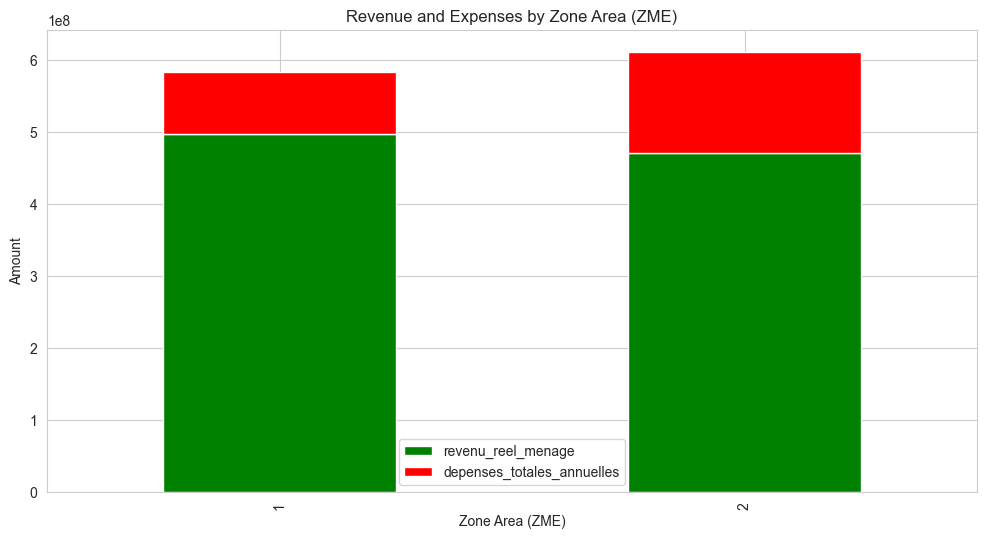

In [156]:
# Aggregate data by zone area (ZME) and compute total revenue and total expenses
revenue_expenses_zme = data.groupby('zme')[['revenu_reel_menage', 'depenses_totales_annuelles']].sum()

# Plot stacked bar chart of revenue and expenses by ZME
revenue_expenses_zme.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.title('Revenue and Expenses by Zone Area (ZME)')
plt.xlabel('Zone Area (ZME)')
plt.ylabel('Amount')
plt.show()


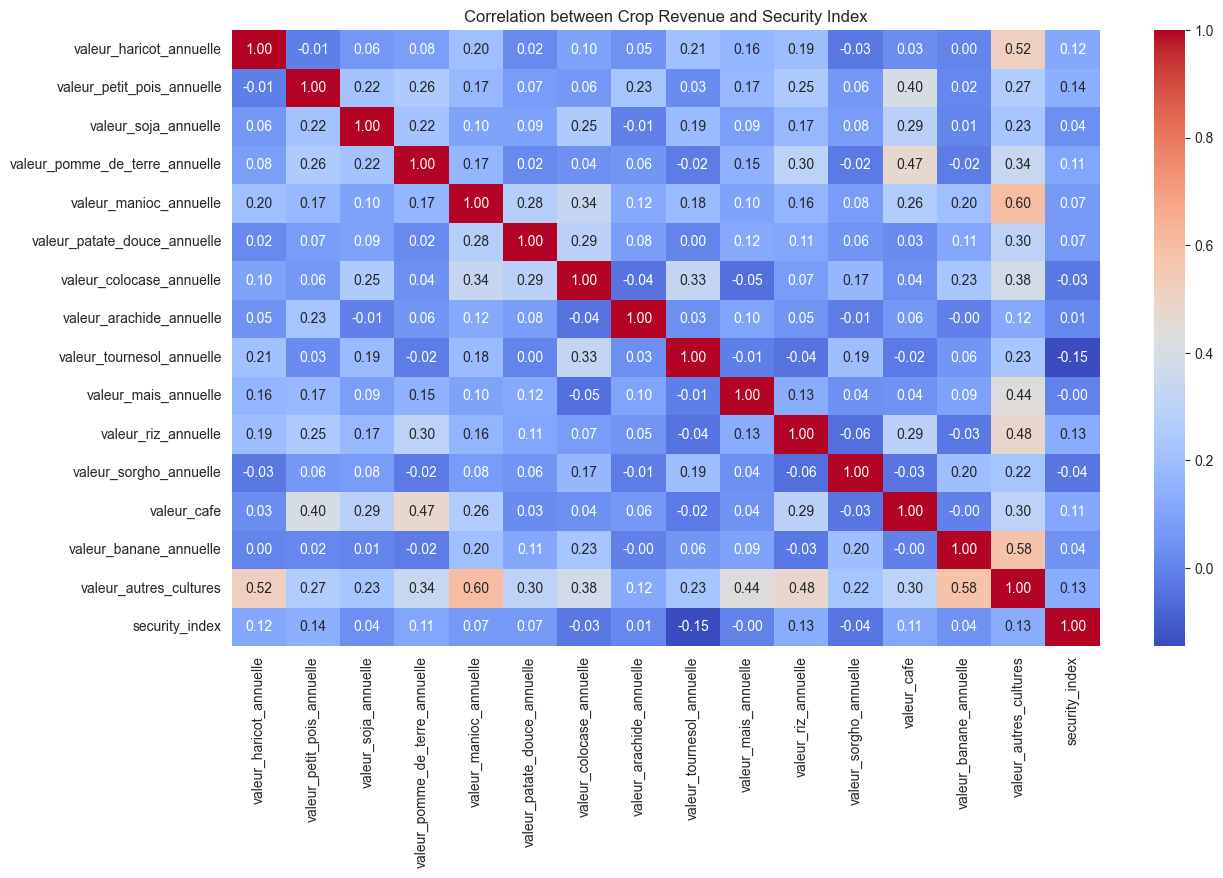

In [157]:
# Select revenue columns related to crops and the security index
crop_revenues = data[['valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 'valeur_soja_annuelle',
                      'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle', 'valeur_patate_douce_annuelle',
                      'valeur_colocase_annuelle', 'valeur_arachide_annuelle', 'valeur_tournesol_annuelle',
                      'valeur_mais_annuelle', 'valeur_riz_annuelle', 'valeur_sorgho_annuelle', 'valeur_cafe',
                      'valeur_banane_annuelle', 'valeur_autres_cultures', 'security_index']]

# Use a heatmap to show the correlation between crop revenues and security index
plt.figure(figsize=(14, 8))
sns.heatmap(crop_revenues.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation between Crop Revenue and Security Index')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\329928136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')


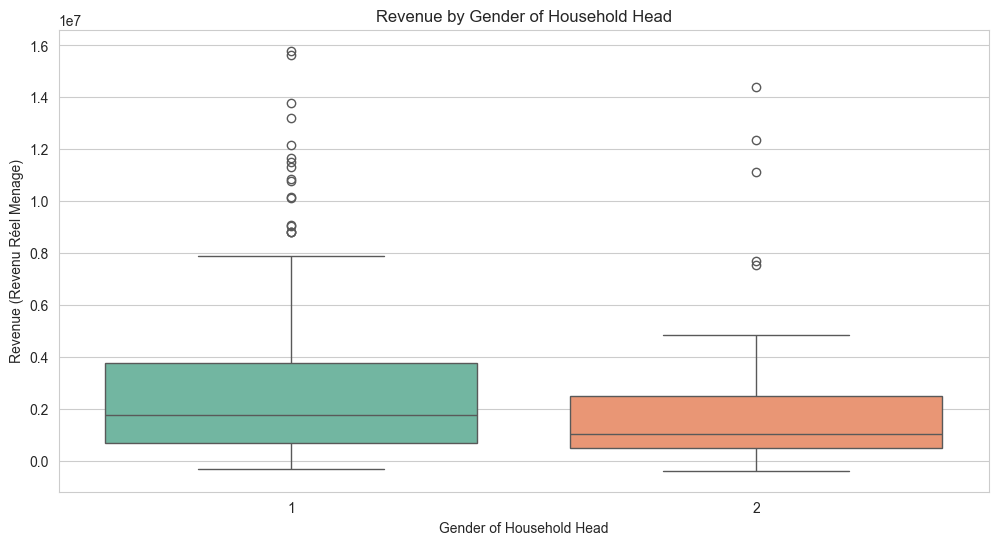

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\329928136.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='genre_chef_menage', y='depenses_totales_annuelles', palette='Set2')


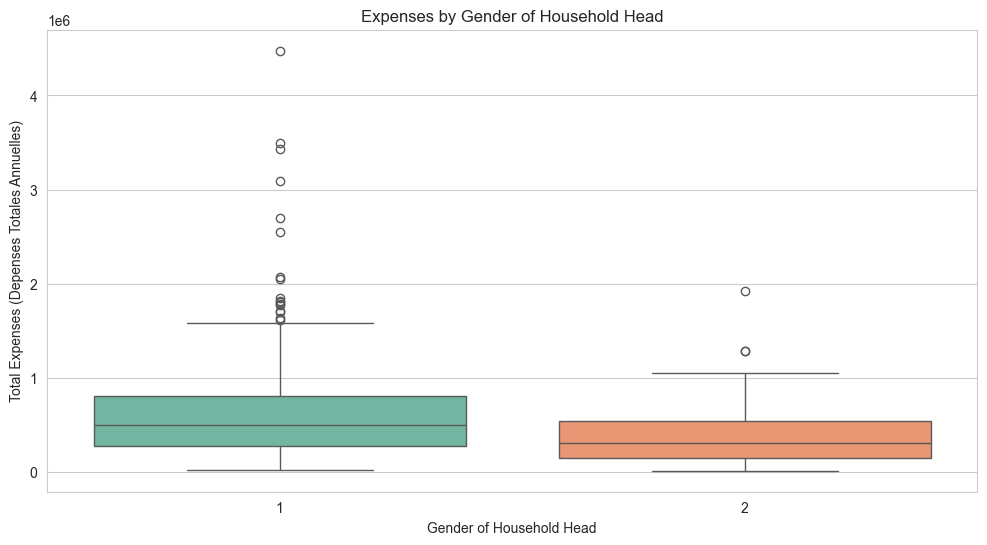

In [158]:
# Boxplot of revenue and expenses by gender of household head
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre_chef_menage', y='revenu_reel_menage', palette='Set2')
plt.title('Revenue by Gender of Household Head')
plt.xlabel('Gender of Household Head')
plt.ylabel('Revenue (Revenu Réel Menage)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='genre_chef_menage', y='depenses_totales_annuelles', palette='Set2')
plt.title('Expenses by Gender of Household Head')
plt.xlabel('Gender of Household Head')
plt.ylabel('Total Expenses (Depenses Totales Annuelles)')
plt.show()


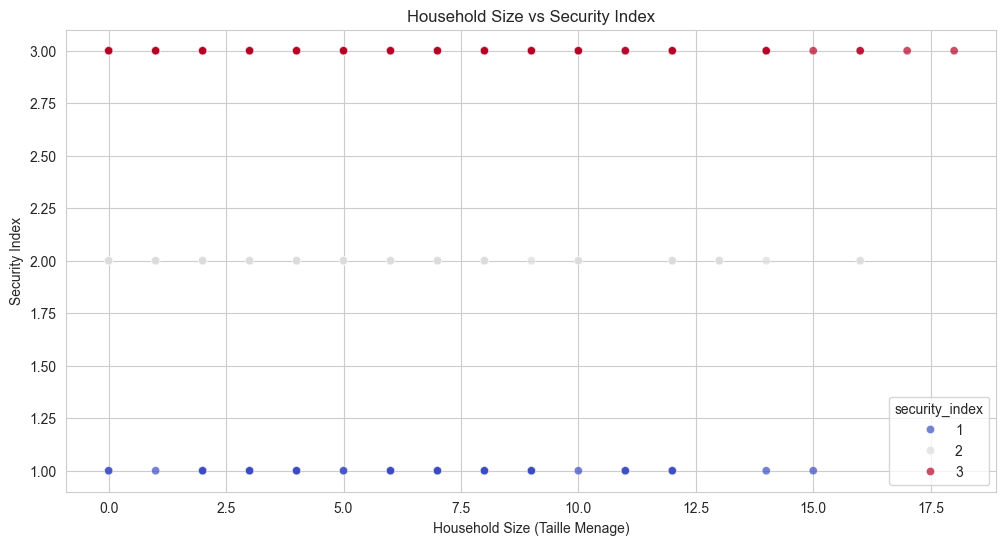

In [159]:
# Scatterplot of household size vs security index
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='taille_menage', y='security_index', hue='security_index', palette='coolwarm', alpha=0.7)
plt.title('Household Size vs Security Index')
plt.xlabel('Household Size (Taille Menage)')
plt.ylabel('Security Index')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3068245326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='education_hommes', y='security_index', palette='coolwarm')


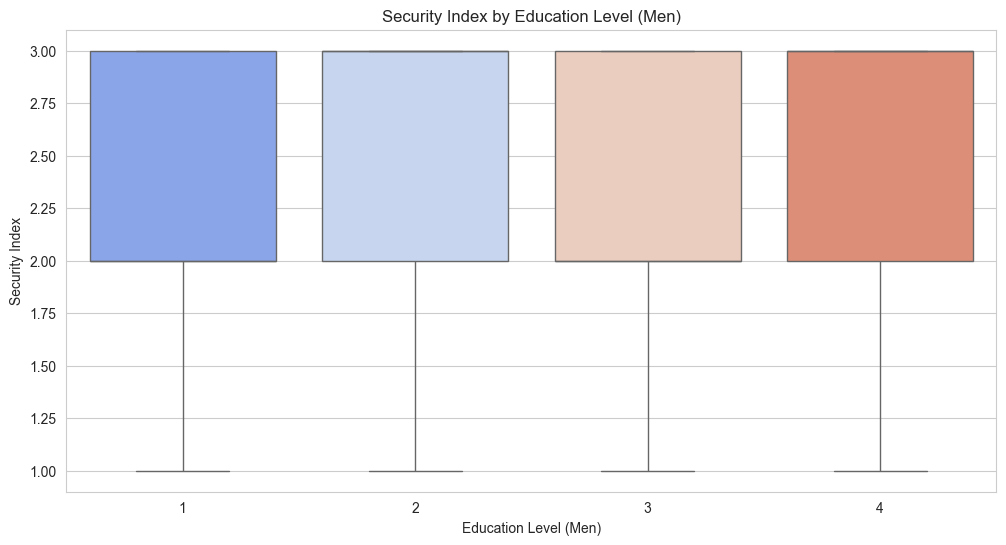

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3068245326.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='education_femmes', y='security_index', palette='coolwarm')


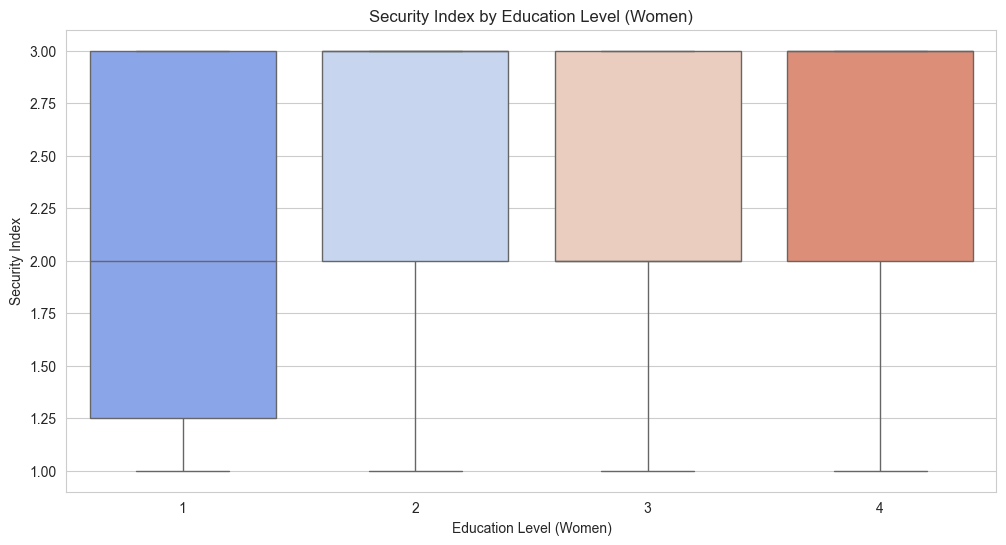

In [160]:
# Boxplot for education of men and women against security index
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education_hommes', y='security_index', palette='coolwarm')
plt.title('Security Index by Education Level (Men)')
plt.xlabel('Education Level (Men)')
plt.ylabel('Security Index')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='education_femmes', y='security_index', palette='coolwarm')
plt.title('Security Index by Education Level (Women)')
plt.xlabel('Education Level (Women)')
plt.ylabel('Security Index')
plt.show()


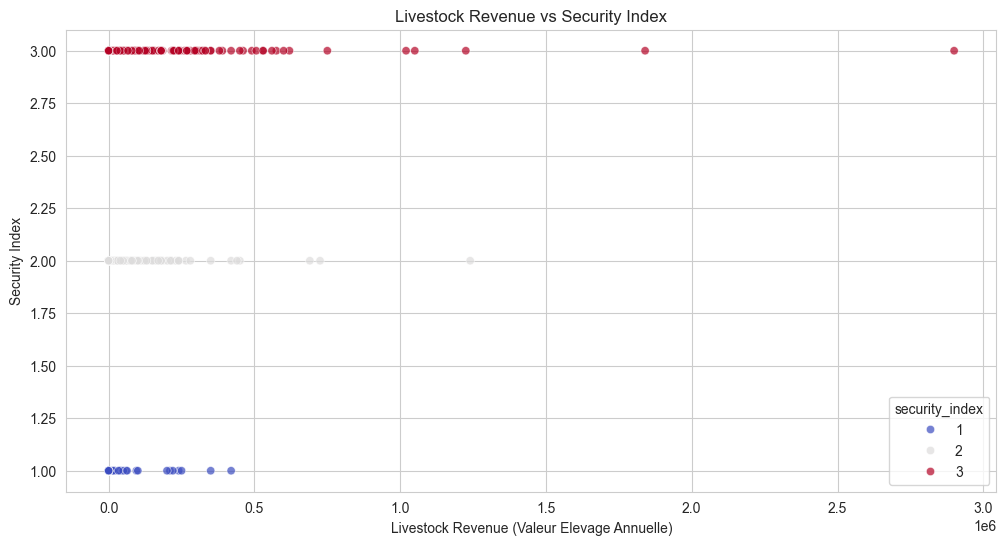

In [161]:
# Correlation between livestock revenue and security index
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='valeur_elevage_annuelle', y='security_index', hue='security_index', palette='coolwarm', alpha=0.7)
plt.title('Livestock Revenue vs Security Index')
plt.xlabel('Livestock Revenue (Valeur Elevage Annuelle)')
plt.ylabel('Security Index')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\4011629712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='irrigation', y='security_index', palette='coolwarm')


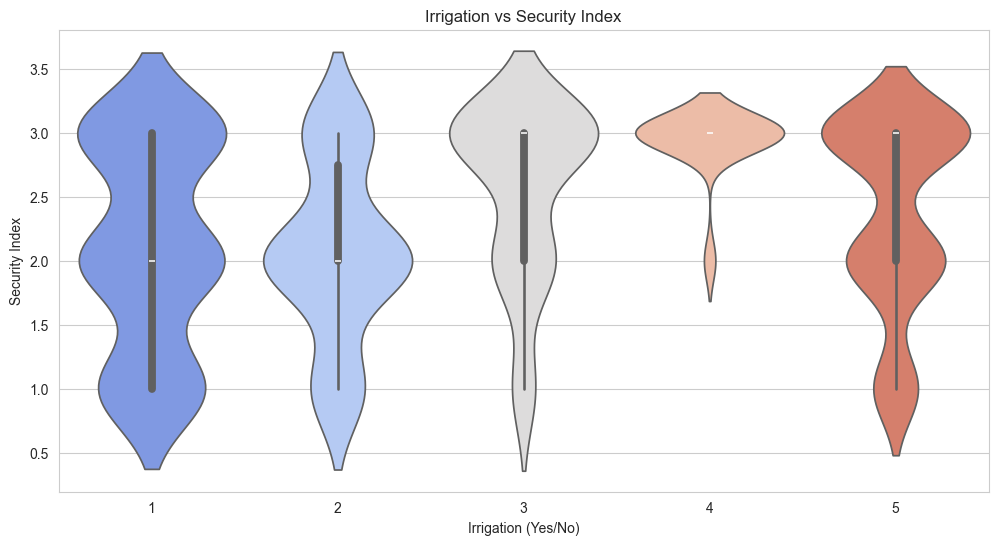

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\4011629712.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='mecanisation', y='security_index', palette='coolwarm')


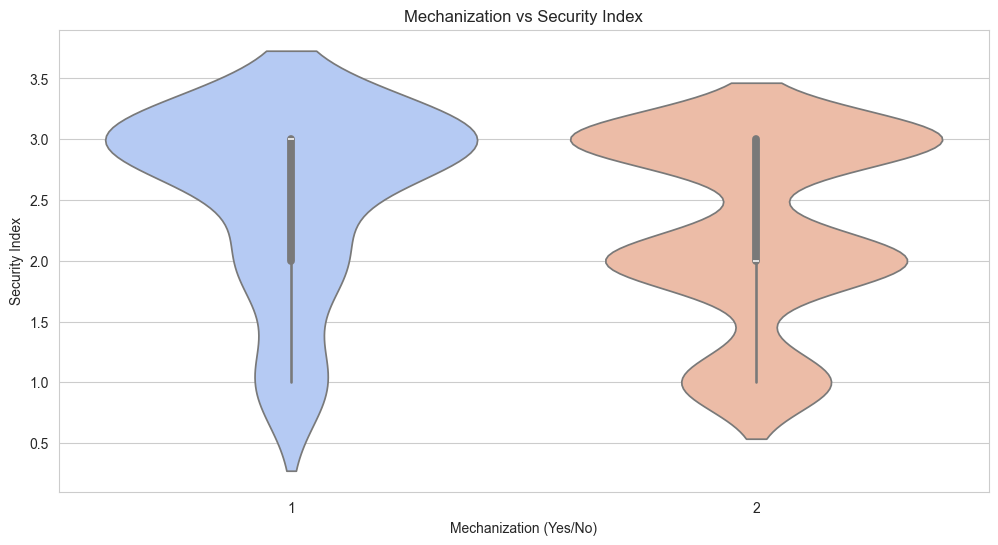

In [162]:
# Violin plot for irrigation vs security index
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='irrigation', y='security_index', palette='coolwarm')
plt.title('Irrigation vs Security Index')
plt.xlabel('Irrigation (Yes/No)')
plt.ylabel('Security Index')
plt.show()

# Violin plot for mechanization vs security index
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='mecanisation', y='security_index', palette='coolwarm')
plt.title('Mechanization vs Security Index')
plt.xlabel('Mechanization (Yes/No)')
plt.ylabel('Security Index')
plt.show()


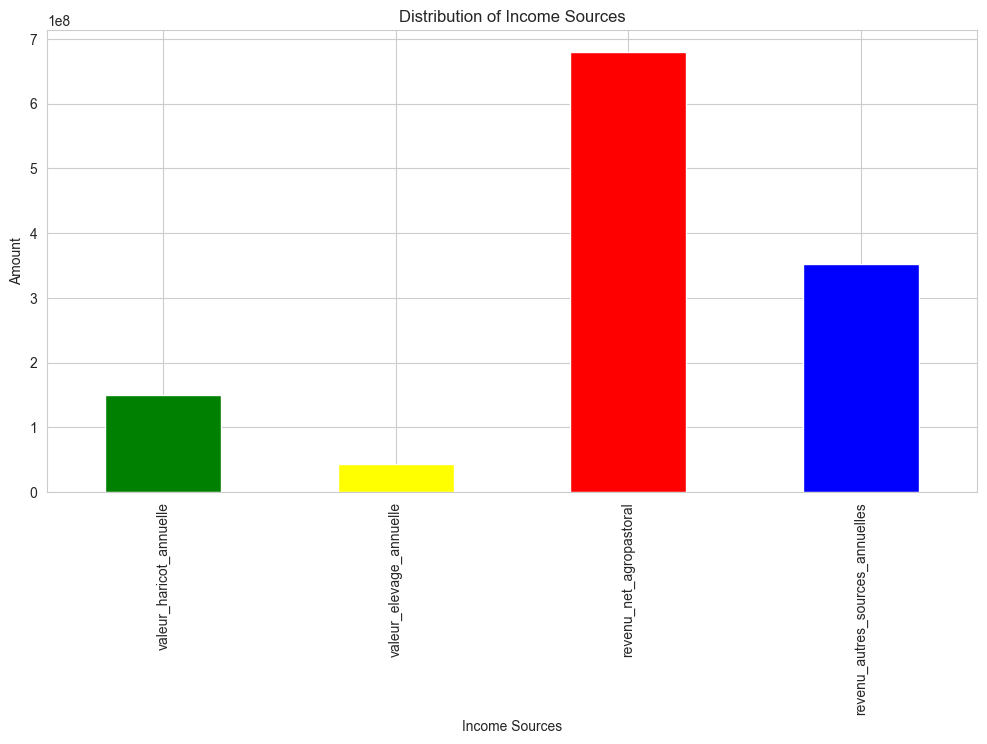

In [163]:
# Create a stacked bar chart showing the distribution of income sources
income_sources = data[['valeur_haricot_annuelle', 'valeur_elevage_annuelle', 'revenu_net_agropastoral', 'revenu_autres_sources_annuelles']]

# Sum income sources and plot
income_sources_sum = income_sources.sum()

income_sources_sum.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'yellow', 'red', 'blue', 'purple'])
plt.title('Distribution of Income Sources')
plt.xlabel('Income Sources')
plt.ylabel('Amount')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\940248678.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index', index=pd.cut(data['valeur_elevage_annuelle'], bins=20),


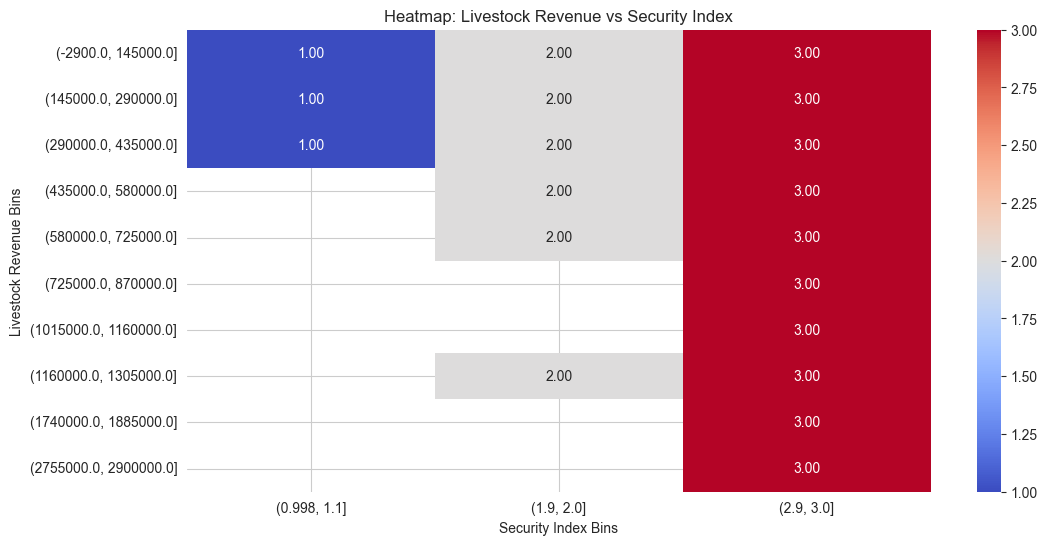

In [164]:
# Create a 2D histogram and plot it as a heatmap
heatmap_data = pd.pivot_table(data, values='security_index', index=pd.cut(data['valeur_elevage_annuelle'], bins=20), 
                              columns=pd.cut(data['security_index'], bins=20), aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap: Livestock Revenue vs Security Index')
plt.xlabel('Security Index Bins')
plt.ylabel('Livestock Revenue Bins')
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1637489363.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1637489363.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, values='security_index',
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1637489363.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(data, value

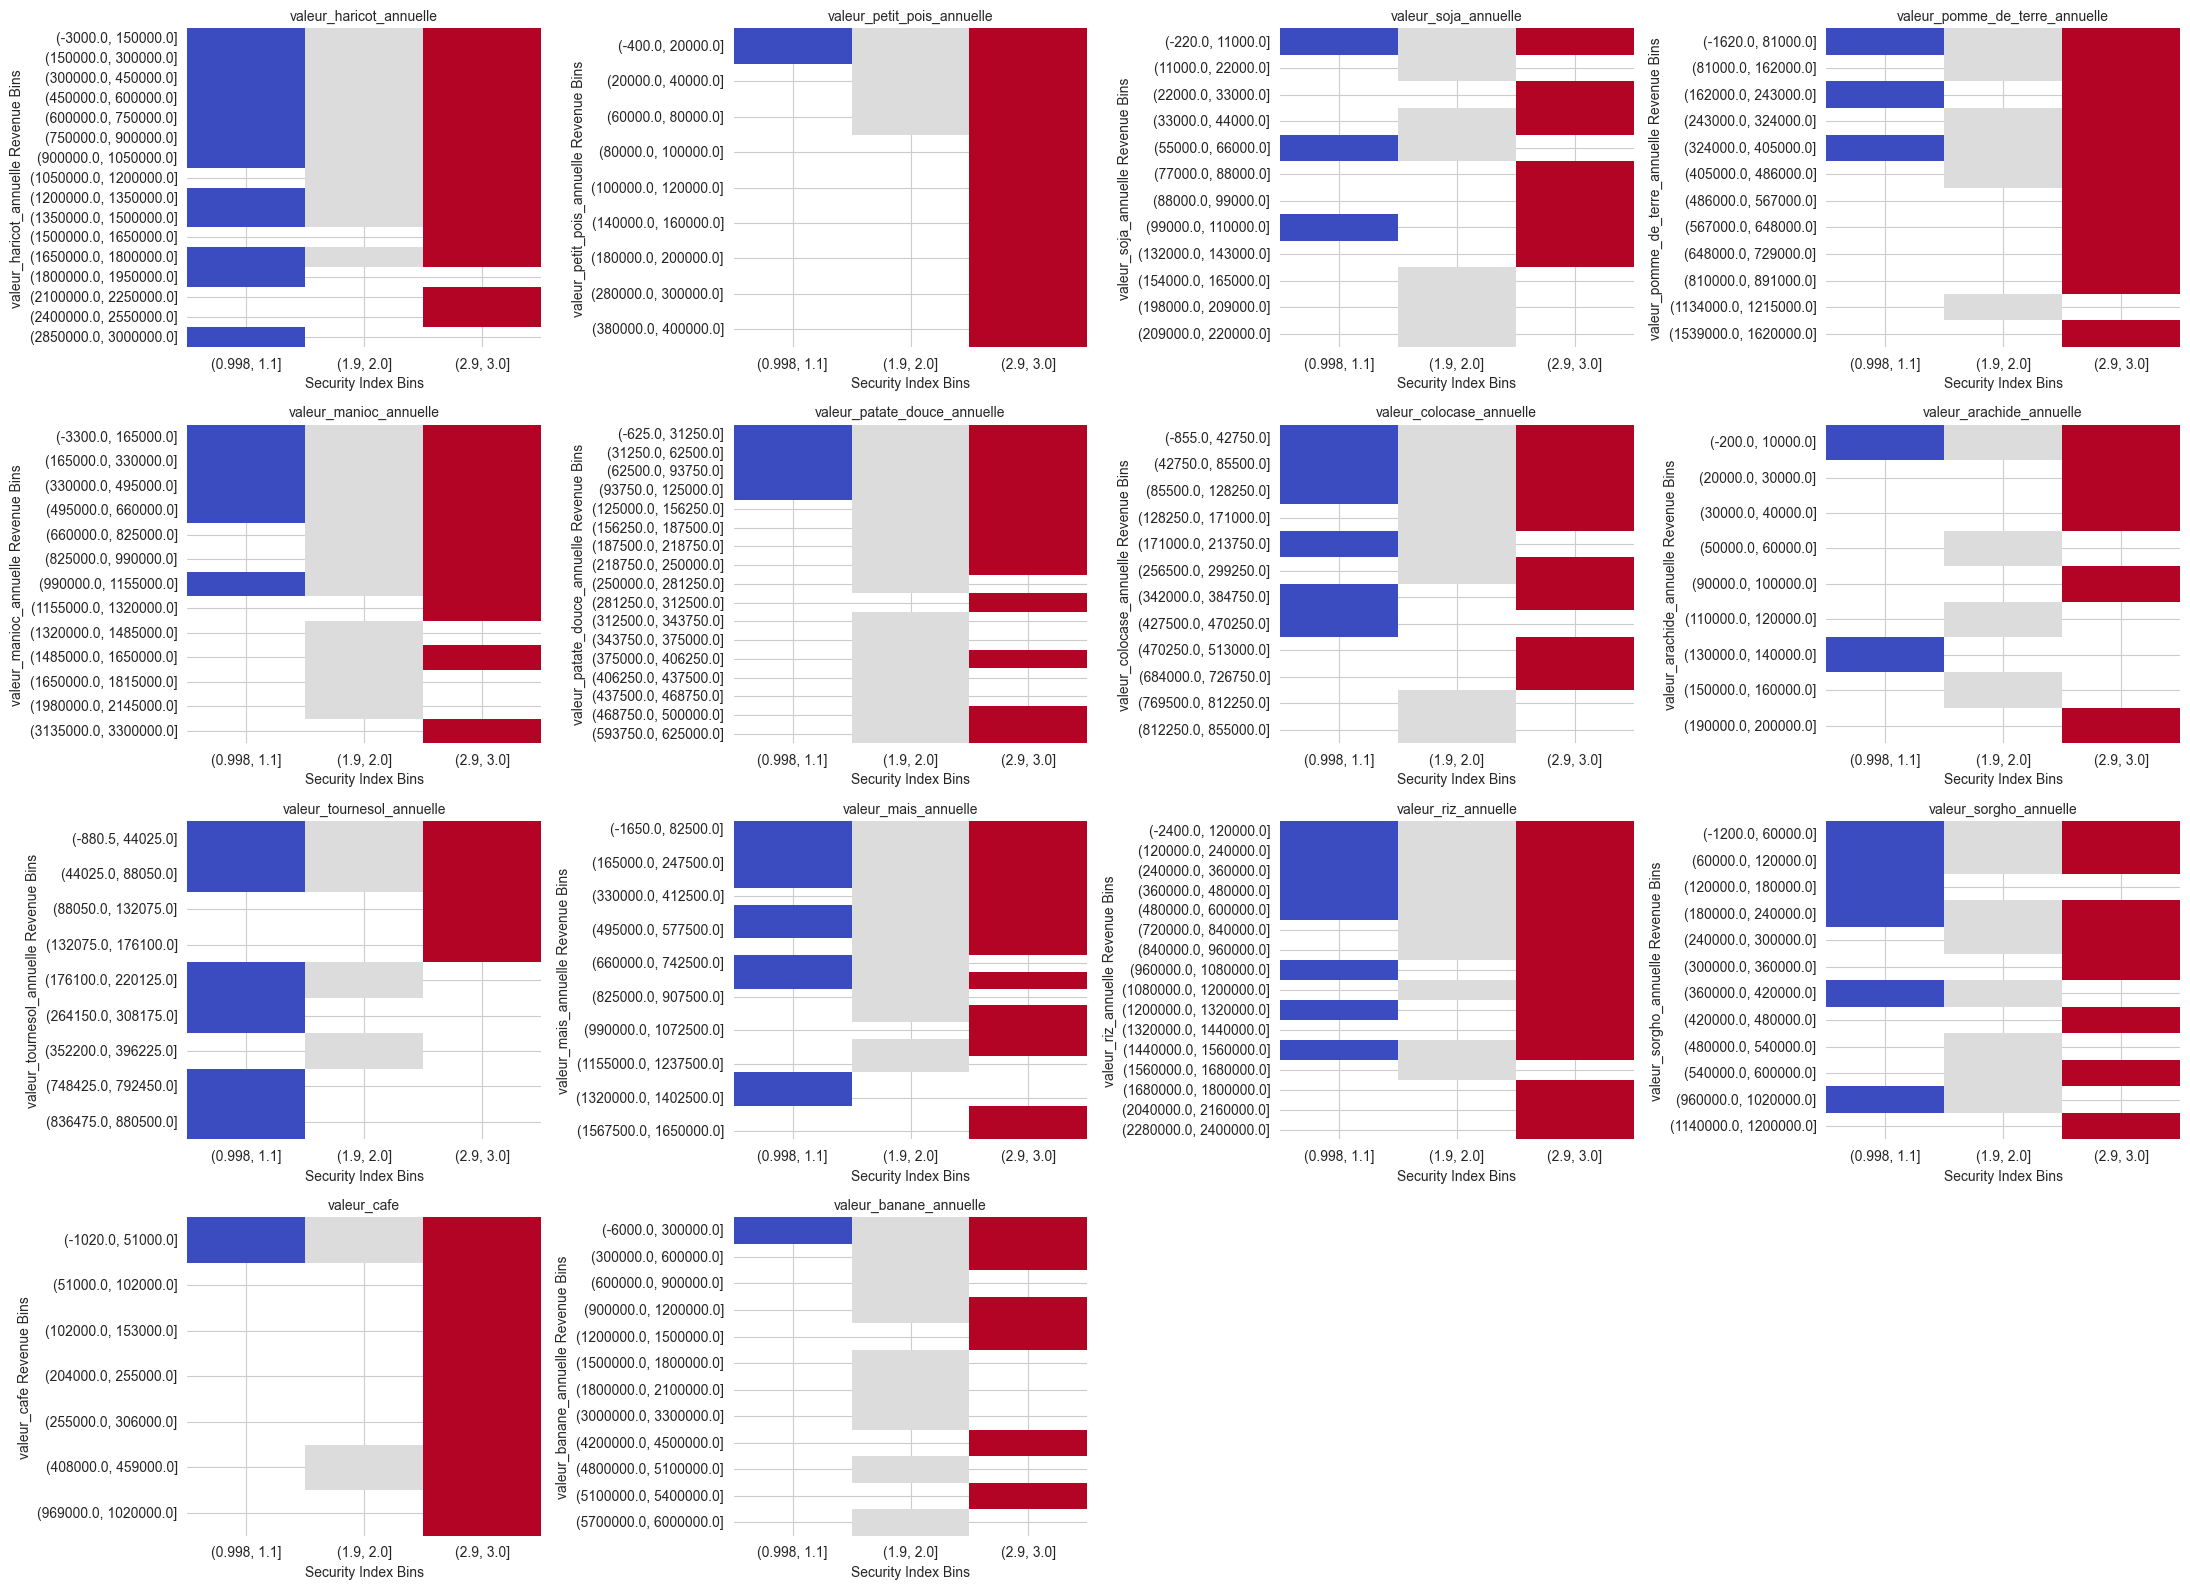

In [165]:
# List of crop revenue columns (exclude animal or other non-crop revenues)
crop_revenue_columns = [
    'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 'valeur_soja_annuelle',
    'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle', 'valeur_patate_douce_annuelle',
    'valeur_colocase_annuelle', 'valeur_arachide_annuelle', 'valeur_tournesol_annuelle',
    'valeur_mais_annuelle', 'valeur_riz_annuelle', 'valeur_sorgho_annuelle', 
    'valeur_cafe', 'valeur_banane_annuelle'
]

# Number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(crop_revenue_columns) + n_cols - 1) // n_cols  # Calculate the number of rows dynamically

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 4 * n_rows))  # Adjust size for readability
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each crop revenue column and plot on a subplot
for idx, crop_column in enumerate(crop_revenue_columns):
    # Create a 2D histogram and compute heatmap data
    heatmap_data = pd.pivot_table(data, values='security_index', 
                                  index=pd.cut(data[crop_column], bins=20), 
                                  columns=pd.cut(data['security_index'], bins=20), 
                                  aggfunc='mean')
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.2f', ax=axes[idx], cbar=False)
    axes[idx].set_title(crop_column, fontsize=10)
    axes[idx].set_xlabel('Security Index Bins')
    axes[idx].set_ylabel(f'{crop_column} Revenue Bins')

# Remove unused subplots if any
for ax in axes[len(crop_revenue_columns):]:
    fig.delaxes(ax)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.5)  # hspace = height spacing, wspace = width spacing

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1514884121.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1514884121.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(
C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\1514884121.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(


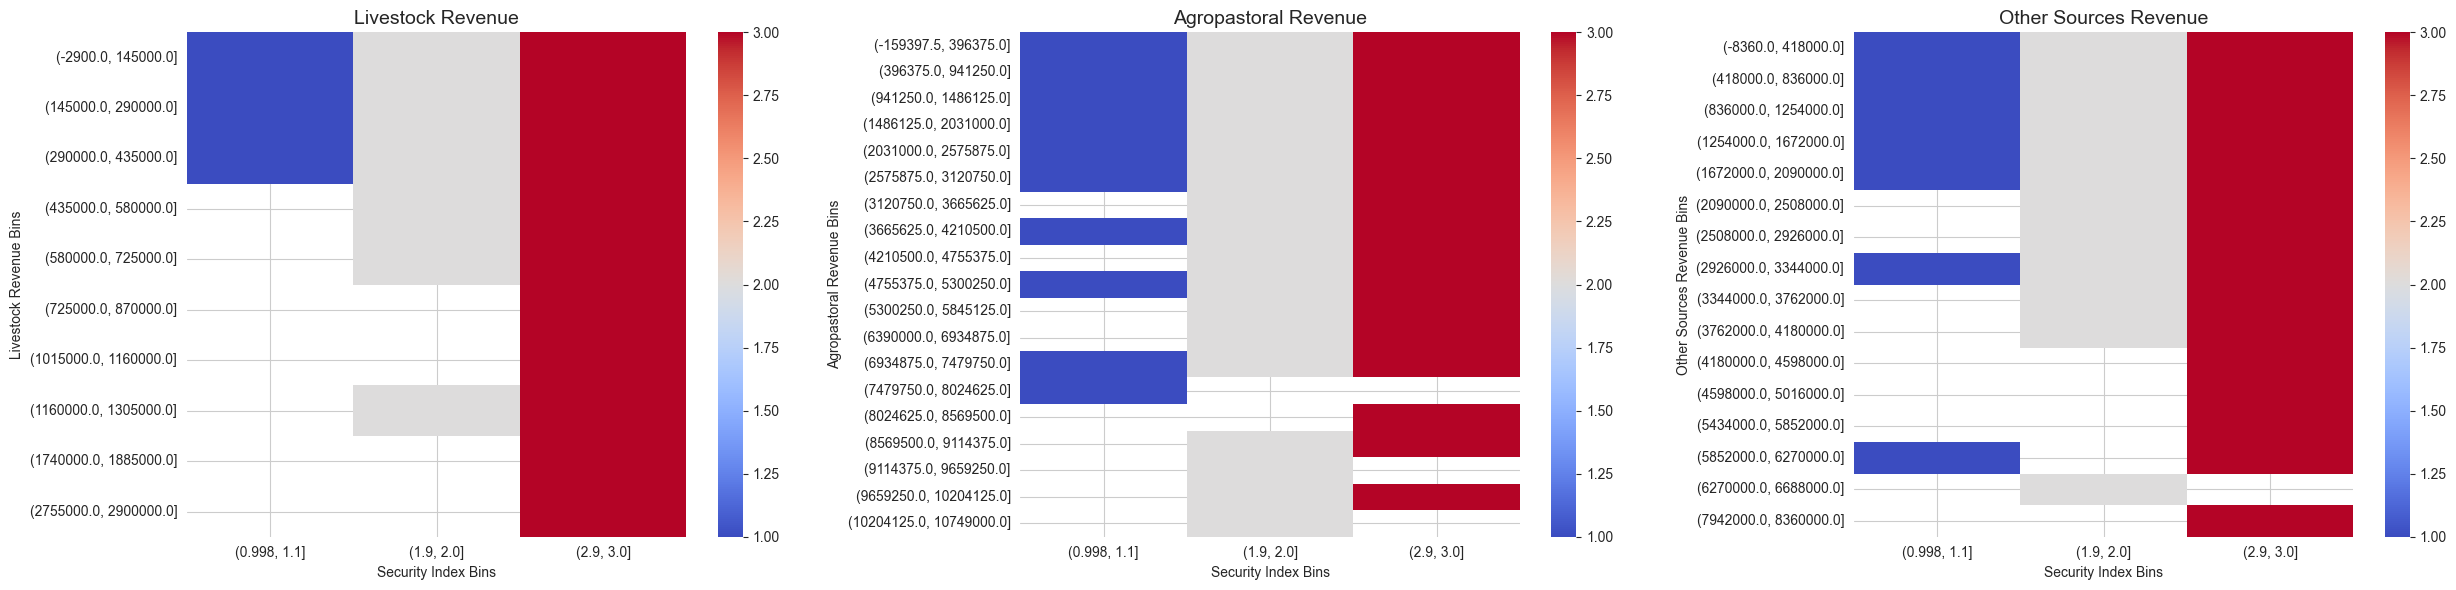

In [166]:
# Columns for the heatmap
columns_to_plot = {
    'Livestock Revenue': 'valeur_elevage_annuelle',
    'Agropastoral Revenue': 'revenu_net_agropastoral',
    'Other Sources Revenue': 'revenu_autres_sources_annuelles'
}

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  # One row with three columns

for idx, (title, column) in enumerate(columns_to_plot.items()):
    # Prepare the heatmap data
    heatmap_data = pd.pivot_table(
        data, 
        values='security_index',
        index=pd.cut(data[column], bins=20),  # Bin the revenue column
        columns=pd.cut(data['security_index'], bins=20),  # Bin the security index
        aggfunc='mean'
    )

    # Plot heatmap
    sns.heatmap(
        heatmap_data,
        cmap='coolwarm',
        annot=False,
        fmt='.2f',
        ax=axes[idx],
        cbar=True
    )
    axes[idx].set_title(title, fontsize=14)
    axes[idx].set_xlabel('Security Index Bins')
    axes[idx].set_ylabel(f'{title} Bins')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=1)

# Tighten layout and display
plt.tight_layout()
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\172438960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='security_index', palette='coolwarm')


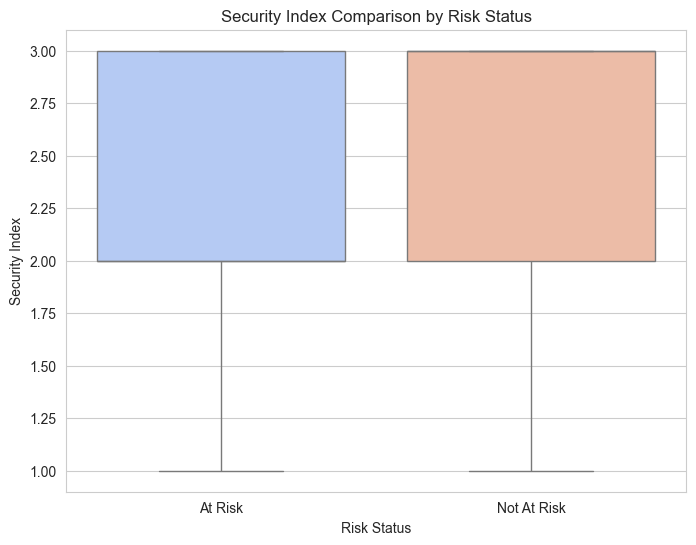

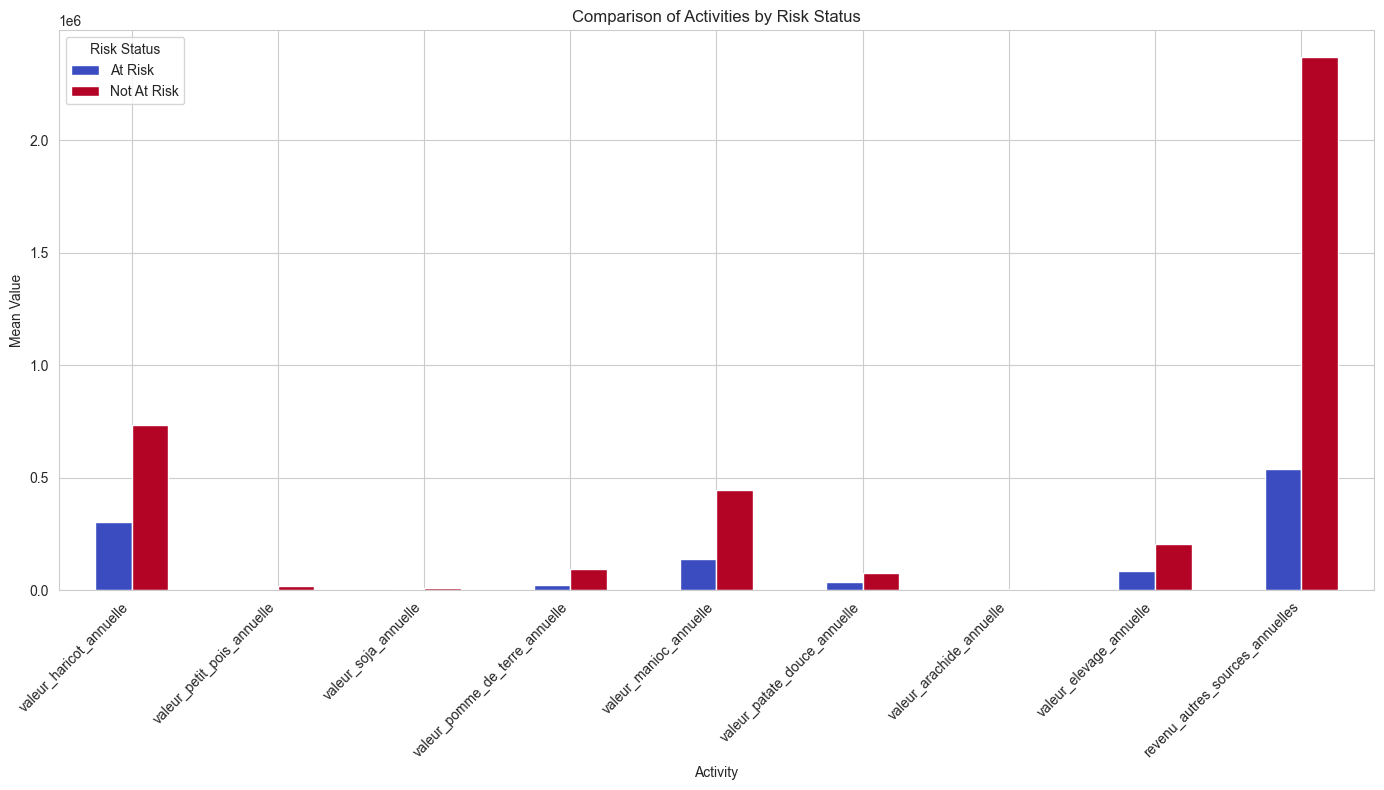

In [167]:
# Step 1: Add a column to classify households as "At Risk" or "Not At Risk"
data['risk_status'] = data.apply(
    lambda row: 'At Risk' if 3911933.5 > row['revenu_reel_menage'] else 'Not At Risk',
    axis=1
)

# Step 2: Investigate the effect on the security index
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='risk_status', y='security_index', palette='coolwarm')
plt.title('Security Index Comparison by Risk Status')
plt.xlabel('Risk Status')
plt.ylabel('Security Index')
plt.show()

# Step 3: Compare activities between groups
columns_to_compare = [
    'valeur_haricot_annuelle', 'valeur_petit_pois_annuelle', 'valeur_soja_annuelle',
    'valeur_pomme_de_terre_annuelle', 'valeur_manioc_annuelle', 'valeur_patate_douce_annuelle',
    'valeur_arachide_annuelle', 'valeur_elevage_annuelle', 'revenu_autres_sources_annuelles'
]

# Calculate mean values for activities by risk status
activity_comparison = data.groupby('risk_status')[columns_to_compare].mean().T

# Visualize the differences
activity_comparison.plot(kind='bar', figsize=(14, 8), colormap='coolwarm')
plt.title('Comparison of Activities by Risk Status')
plt.ylabel('Mean Value')
plt.xlabel('Activity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Status', loc='upper left')
plt.tight_layout()
plt.show()


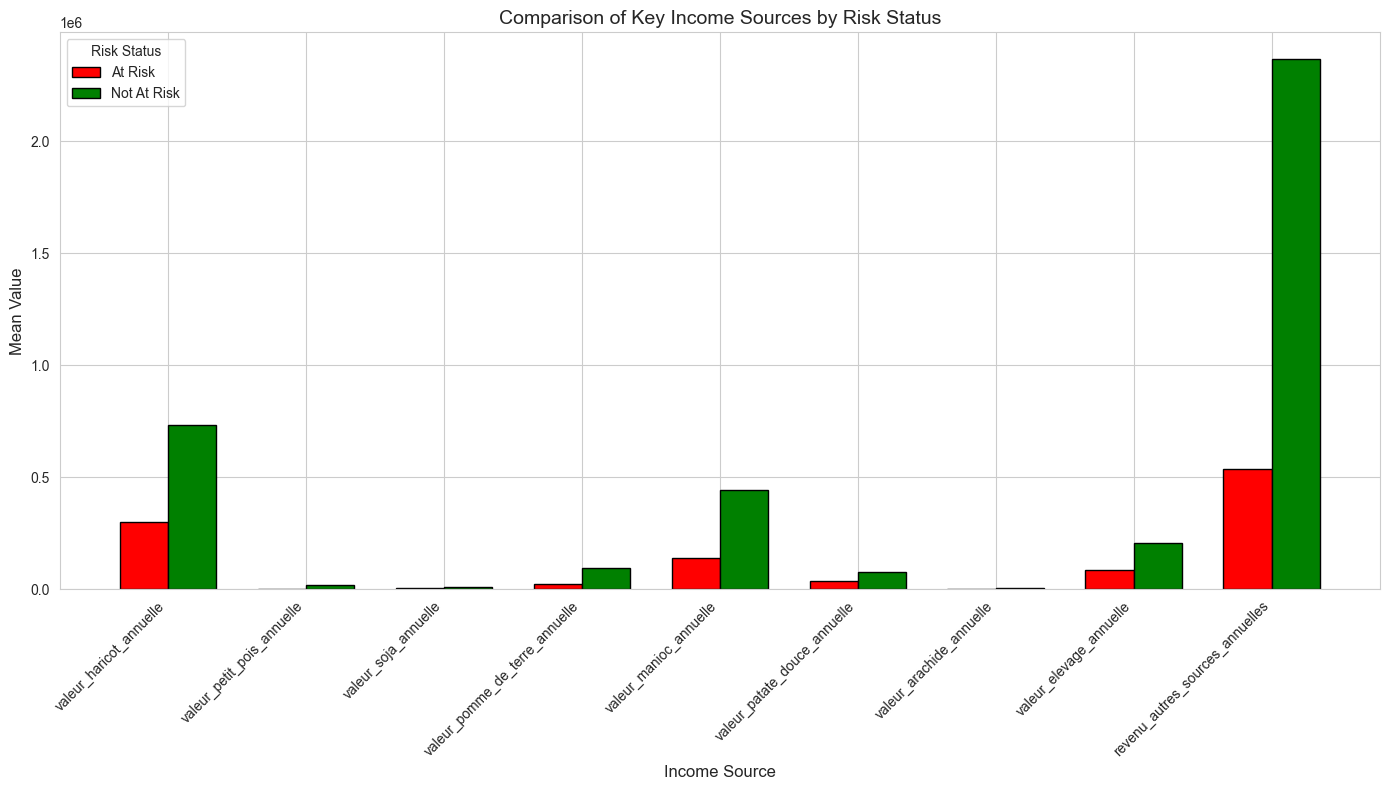

In [168]:
# Step 1: Define colors for each group
colors = ['red', 'green']  # 'At Risk' -> Red, 'Not At Risk' -> Green

# Step 2: Calculate mean values for each group
comparison_data = data.groupby('risk_status')[columns_to_compare].mean().T

# Step 3: Create a bar plot with custom colors
fig, ax = plt.subplots(figsize=(14, 8))

# Create bar plots for each risk category
bar_width = 0.35
index = np.arange(len(comparison_data.index))

for i, status in enumerate(comparison_data.columns):
    ax.bar(index + i * bar_width, 
           comparison_data[status], 
           bar_width, 
           color=colors[i], 
           label=status, 
           edgecolor='black')

# Add labels, title, and legend
ax.set_title('Comparison of Key Income Sources by Risk Status', fontsize=14)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_xlabel('Income Source', fontsize=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(comparison_data.index, rotation=45, ha='right', fontsize=10)
ax.legend(title='Risk Status', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


In [169]:
data['risk_status'].unique()

array(['At Risk', 'Not At Risk'], dtype=object)

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3990713912.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='age_chef_menage', palette={"At Risk": "red", "Not At Risk": "green"})


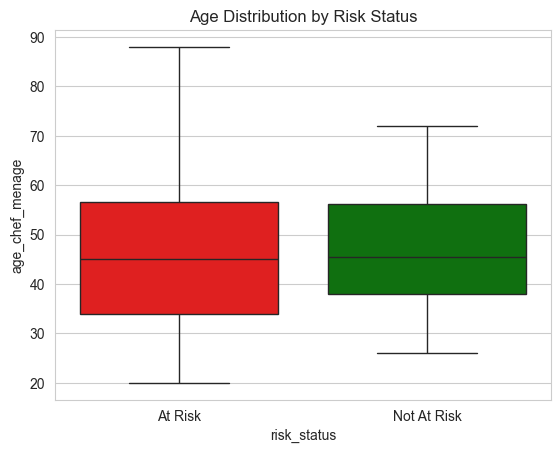

In [170]:
# Analysis 1: Demographic Characteristics
# Compare age, gender, marital status, education, and household size between groups.

# Age comparison
sns.boxplot(data=data, x='risk_status', y='age_chef_menage', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Age Distribution by Risk Status")
plt.show()

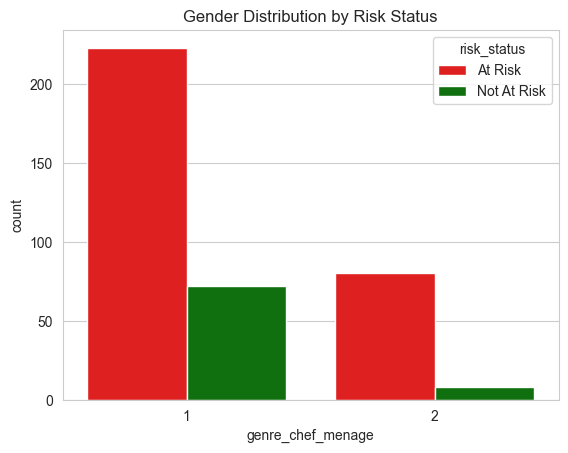

In [171]:
# Gender comparison
sns.countplot(data=data, x='genre_chef_menage', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Gender Distribution by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3700583343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='taille_menage', palette={"At Risk": "red", "Not At Risk": "green"})


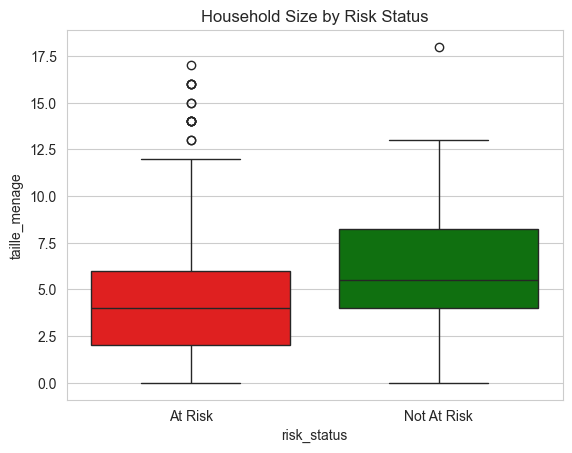

In [172]:
# Household size comparison
sns.boxplot(data=data, x='risk_status', y='taille_menage', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Household Size by Risk Status")
plt.show()

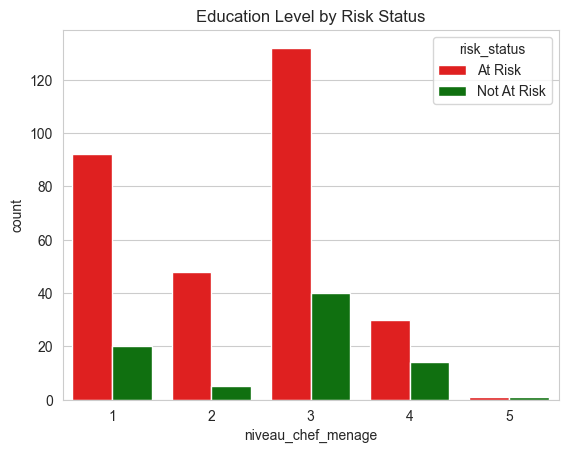

In [173]:
# Education level comparison
sns.countplot(data=data, x='niveau_chef_menage', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Education Level by Risk Status")
plt.show()

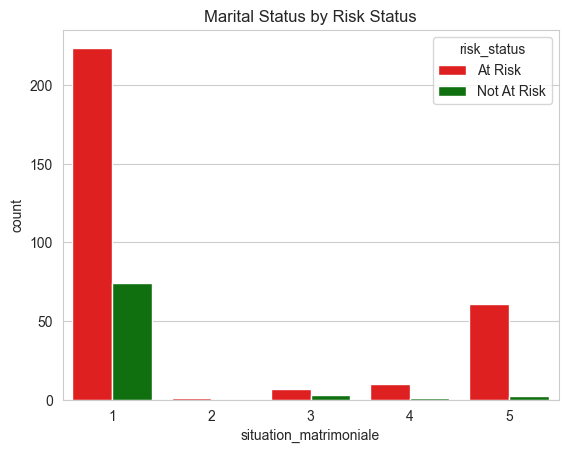

In [174]:
# Marital status comparison
sns.countplot(data=data, x='situation_matrimoniale', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Marital Status by Risk Status")
plt.show()

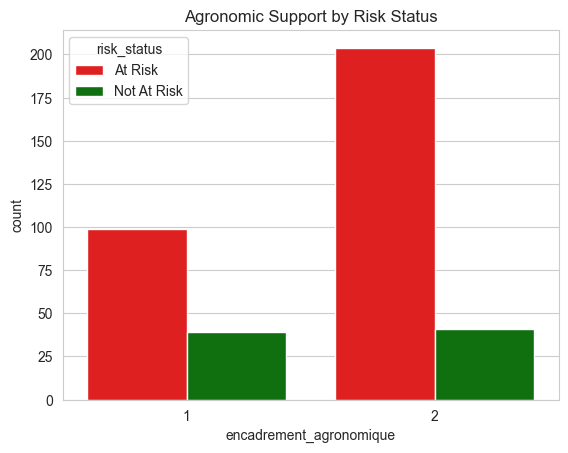

In [175]:
sns.countplot(data=data, x='encadrement_agronomique', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Agronomic Support by Risk Status")
plt.show()

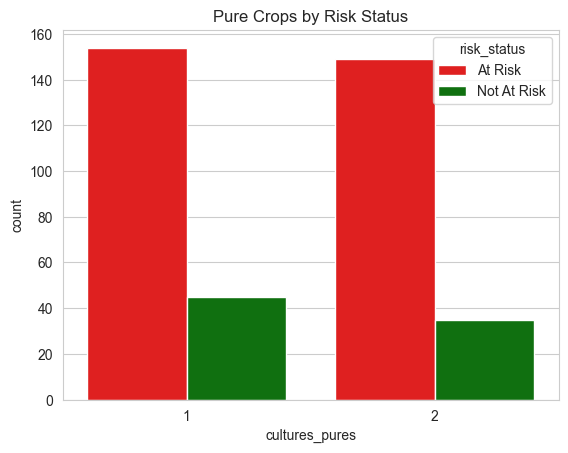

In [176]:
sns.countplot(data=data, x='cultures_pures', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Pure Crops by Risk Status")
plt.show()

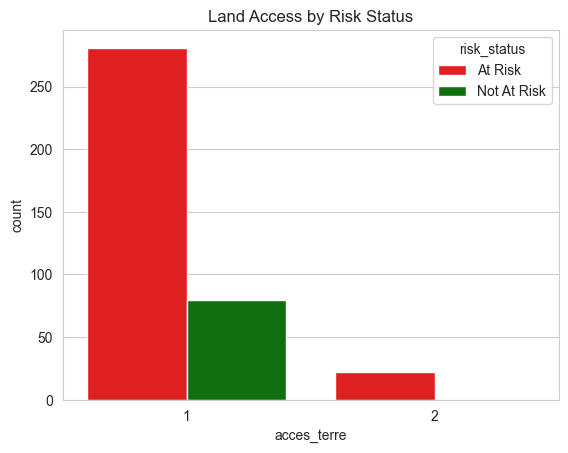

In [177]:
# Analysis 3: Access to Resources
# Analyze land access, irrigation, and labor availability.
sns.countplot(data=data, x='acces_terre', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Land Access by Risk Status")
plt.show()

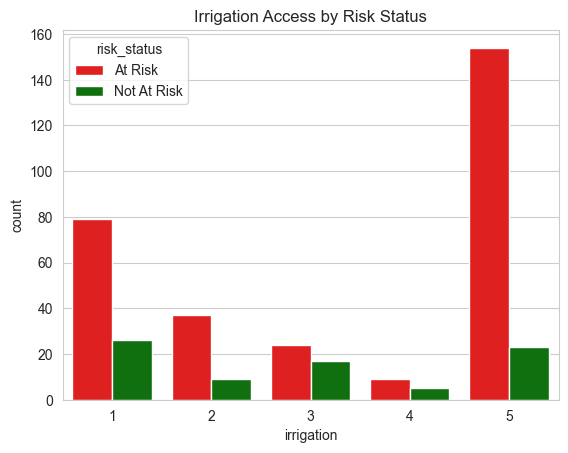

In [178]:
sns.countplot(data=data, x='irrigation', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Irrigation Access by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2800391409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='main_doeuvre_disponible', palette={"At Risk": "red", "Not At Risk": "green"})


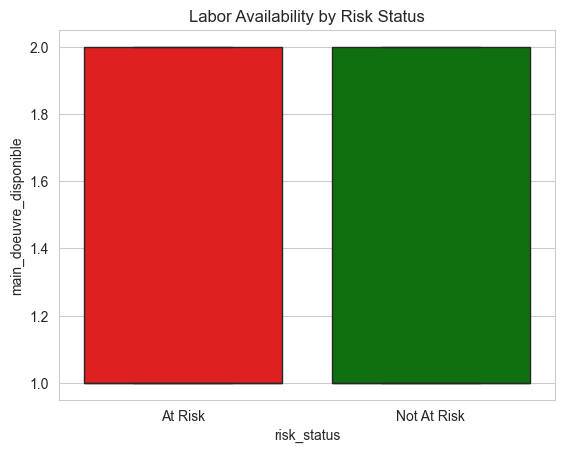

In [179]:
sns.boxplot(data=data, x='risk_status', y='main_doeuvre_disponible', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Labor Availability by Risk Status")
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2309448297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='cultures_annuelles_12m', palette={"At Risk": "red", "Not At Risk": "green"})


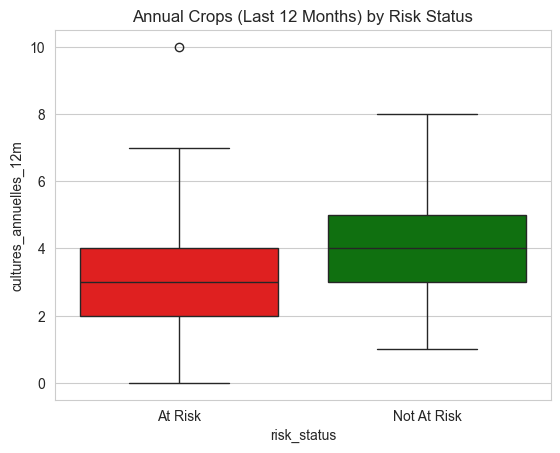

In [180]:

# Analysis 4: Production Characteristics
# Compare annual and perennial crops, cash crops, and crop diversity.
sns.boxplot(data=data, x='risk_status', y='cultures_annuelles_12m', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Annual Crops (Last 12 Months) by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2739159429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='cultures_perennes_12m', palette={"At Risk": "red", "Not At Risk": "green"})


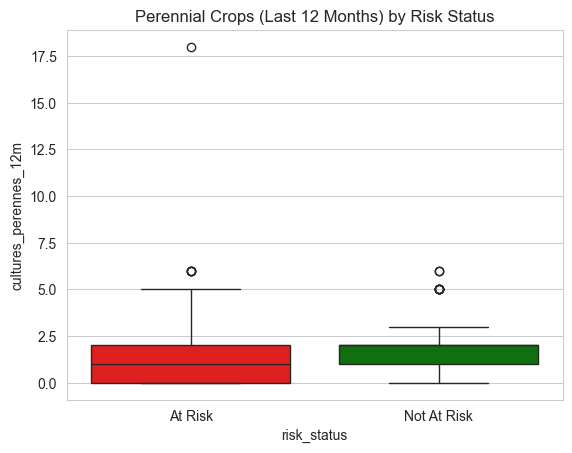

In [181]:
sns.boxplot(data=data, x='risk_status', y='cultures_perennes_12m', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Perennial Crops (Last 12 Months) by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3648256132.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='ventes_cultures_rente_change', palette={"At Risk": "red", "Not At Risk": "green"})


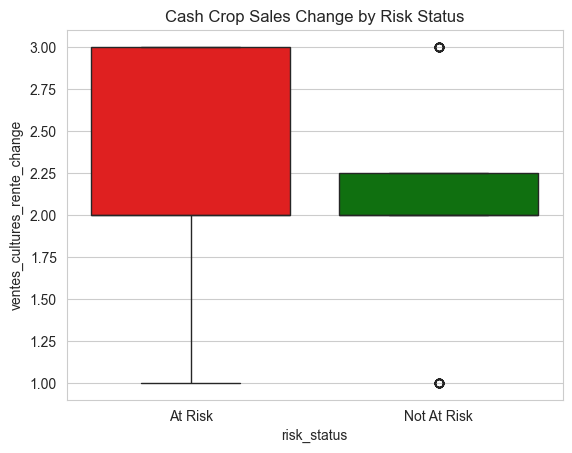

In [182]:
sns.boxplot(data=data, x='risk_status', y='ventes_cultures_rente_change', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Cash Crop Sales Change by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2239719163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='repas_enfants_jour', palette={"At Risk": "red", "Not At Risk": "green"})


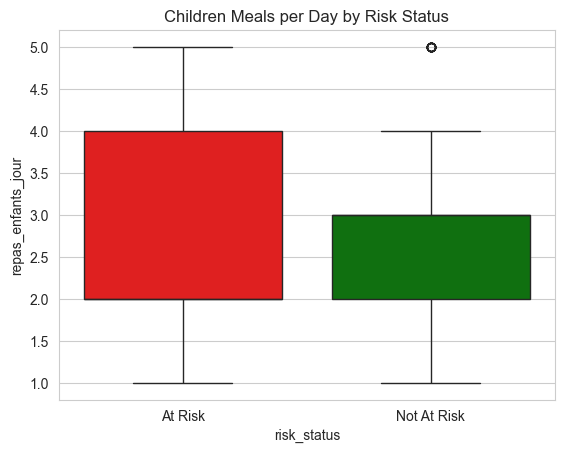

In [183]:
# Analysis 5: Household Welfare
# Analyze meal frequency and stock duration.
sns.boxplot(data=data, x='risk_status', y='repas_enfants_jour', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Children Meals per Day by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3391598927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='duree_stock_saison_a', palette={"At Risk": "red", "Not At Risk": "green"})


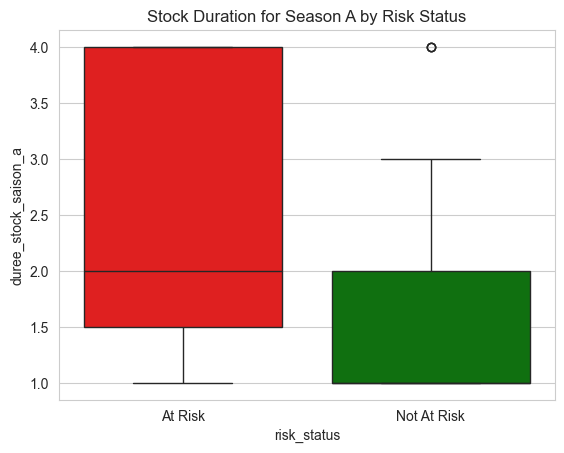

In [184]:
sns.boxplot(data=data, x='risk_status', y='duree_stock_saison_a', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Stock Duration for Season A by Risk Status")
plt.show()


C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3124125628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='revenu_net_agropastoral', palette={"At Risk": "red", "Not At Risk": "green"})


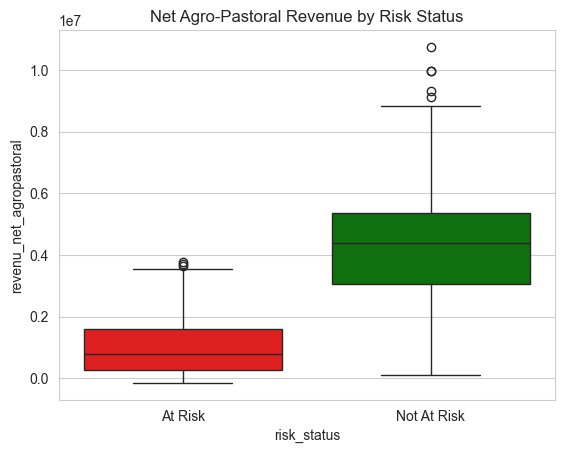

In [185]:
# Analysis 6: Economic Activities
# Compare income sources and economic specialization.
sns.boxplot(data=data, x='risk_status', y='revenu_net_agropastoral', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Net Agro-Pastoral Revenue by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2114732256.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='risk_status', y='revenu_autres_sources_annuelles', palette={"At Risk": "red", "Not At Risk": "green"})


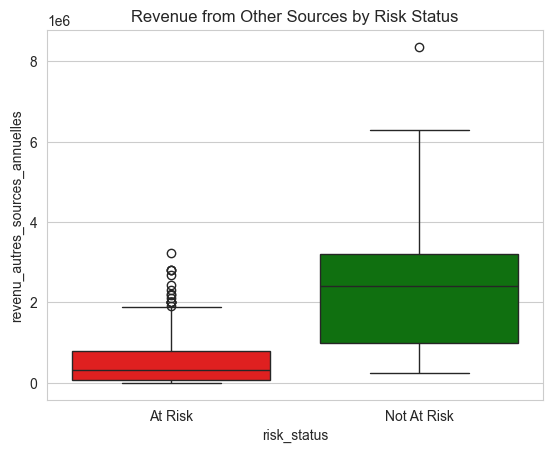

In [186]:
sns.boxplot(data=data, x='risk_status', y='revenu_autres_sources_annuelles', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Revenue from Other Sources by Risk Status")
plt.show()

In [187]:
df = data

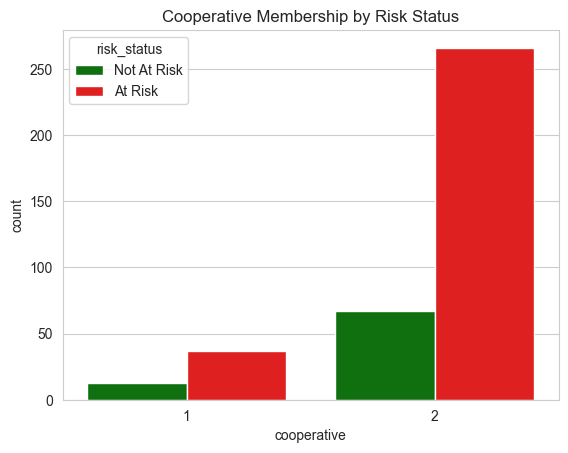

In [188]:
# Analysis 7: Social and Organizational Support
# Compare cooperative membership and organizational support.
sns.countplot(data=df, x='cooperative', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Cooperative Membership by Risk Status")
plt.show()

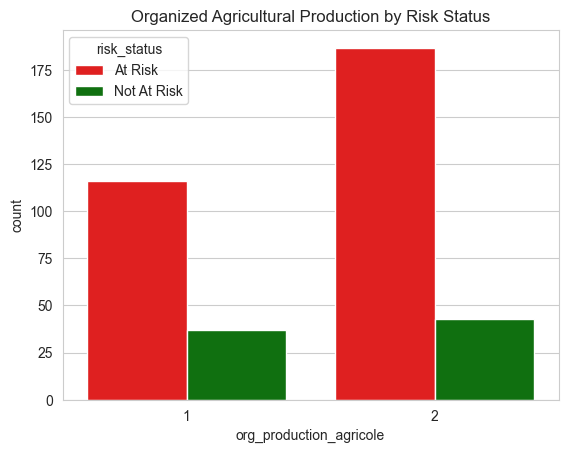

In [189]:
sns.countplot(data=df, x='org_production_agricole', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Organized Agricultural Production by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\602141188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_status', y='education_hommes', palette={"At Risk": "red", "Not At Risk": "green"})


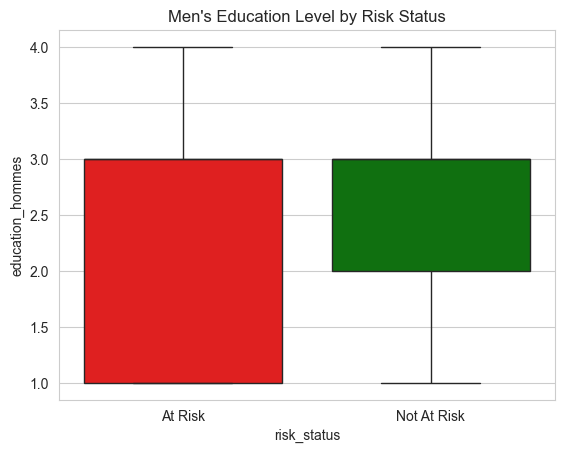

In [190]:
# Analysis 8: Education Levels
# Compare education levels of men and women.
sns.boxplot(data=df, x='risk_status', y='education_hommes', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Men's Education Level by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2080623308.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_status', y='education_femmes', palette={"At Risk": "red", "Not At Risk": "green"})


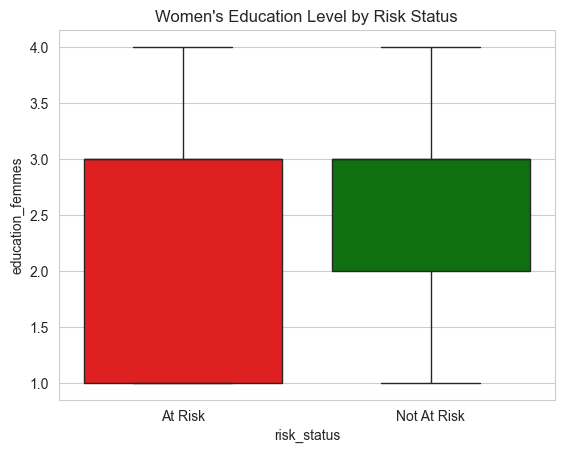

In [191]:
sns.boxplot(data=df, x='risk_status', y='education_femmes', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Women's Education Level by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\895565604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_status', y='nombre_pieces_logement', palette={"At Risk": "red", "Not At Risk": "green"})


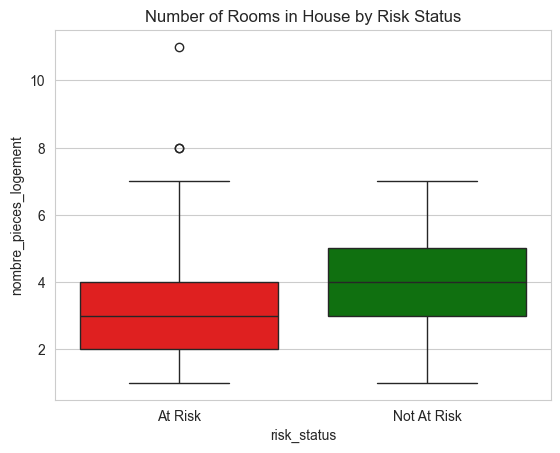

In [192]:
# Analysis 9: Housing and Living Conditions
# Compare number of rooms and housing conditions.
sns.boxplot(data=df, x='risk_status', y='nombre_pieces_logement', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Number of Rooms in House by Risk Status")
plt.show()

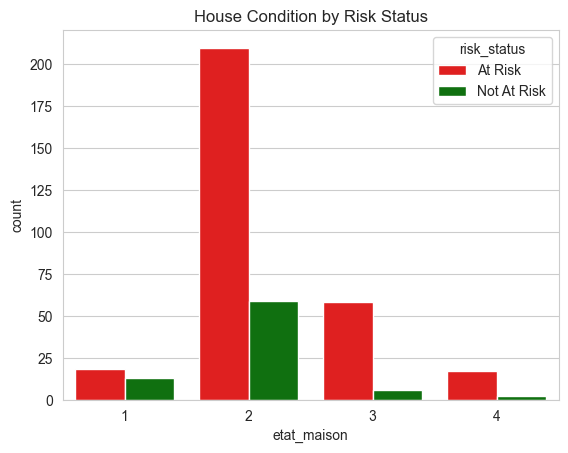

In [193]:
sns.countplot(data=df, x='etat_maison', hue='risk_status', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("House Condition by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\3522303525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_status', y='security_index', palette={"At Risk": "red", "Not At Risk": "green"})


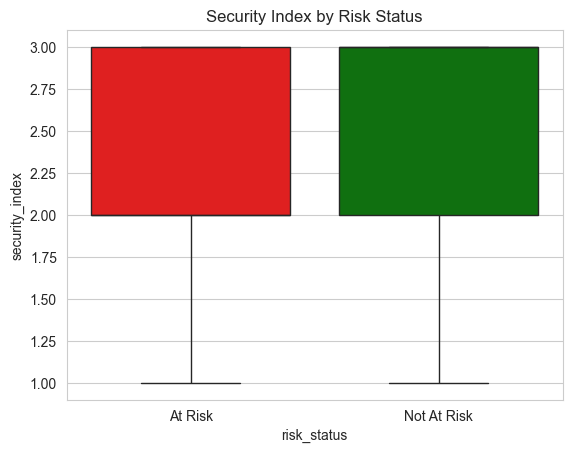

In [194]:
# Analysis 10: Security Index
# Compare security index across all other variables.
sns.boxplot(data=df, x='risk_status', y='security_index', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Security Index by Risk Status")
plt.show()

C:\Users\Audace\AppData\Local\Temp\ipykernel_17852\2521561078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risk_status', y='nombre_saisons', palette={"At Risk": "red", "Not At Risk": "green"})


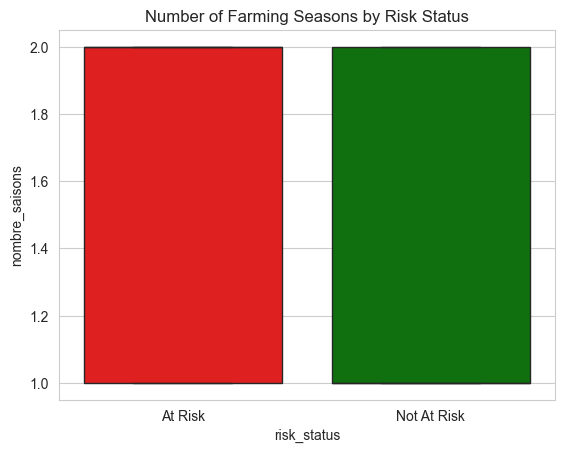

In [195]:
# Analysis 11: Time-Based Analysis
# Compare production experience and number of seasons.
sns.boxplot(data=df, x='risk_status', y='nombre_saisons', palette={"At Risk": "red", "Not At Risk": "green"})
plt.title("Number of Farming Seasons by Risk Status")
plt.show()